<center><br>Industrial Engineering and Management
<br>Tel Aviv University
<br>
<br><b><font size=10>Final Project</font></b><br>
<b>Introduction to Machine Learning</b>
<br>Spring 2023
<br>
<br><b>Group 9</b>
<br>Tzlil Boostani
</center>

# Table of Contents
* [Section 0: Importing Relevant Libraries and Dataset](#Section-0:-Importing-Relevant-Libraries-and-Dataset)
* [Section 1: Exploration](#Section-1:-Exploration)
    * [1.1: Initial understanding of the data](#1.1-Initial-understanding-of-the-data)
    * [1.2: Organizing the data](#1.2-Organizing-the-data)
    * [1.3: Trying to understand how the features behave](#1.3-Trying-to-understand-how-the-features-behave)
<br><br>    
* [Section 2: Preprocess](#Section-2:-Preprocess)
    * [2.1: Dealing with missing values](#2.1-Dealing-with-missing-values)
    * [2.2: Dealing with outliners](#2.2-Dealing-with-outliners)
    * [2.3: Dealing with categorical features & binary features](#2.3-Dealing-with-categorical-features-&-binary-features)
        * [2.3.1: Dealing with non-ordinal categorical features](#2.3.1-Dealing-with-non-ordinal-categorical-features)
        * [2.3.2: Dealing with ordinal categorical features](#2.3.2-Dealing-with-ordinal-categorical-features)
        * [2.3.3: Dealing with binary features](#2.3.3-Dealing-with-binary-features)
    * [2.4: Normalizing the features (Scaling)](#2.4-Normalizing-the-features-(Scaling))
    * [2.5: Dimensions Addressing](#2.5-Dimensions-Addressing)
        * [2.5.1: PCA](#2.5.1-PCA)
        * [2.5.2: Features selection based on studies](#2.5.2-Features-selection-based-on-studies)
    * [2.6: Preforming preprocess on the test set](#2.6-Preforming-preprocess-on-the-test-set)
<br><br>    
* [Section 3: Building Models](#Section-3:-Building-Models)
    * [3.1: Getting ready](#3.1-Getting-ready)
    * [3.2: Logistic Regression](#3.2-Logistic-Regression)
    * [3.3: Multi-Layer Perceptron (MLP)](#3.3-Multi-Layer-Perceptron-(MLP))
    * [3.4: Random Forest](#3.4-Random-Forest)
    * [3.5: Support Vector Machines (SVM)](#3.5-Support-Vector-Machines-(SVM))
<br><br>    
* [Section 4: Models Evaluation](#Section-4:-Models-Evaluation)
    * [4.1: K-Fold Cross Validation](#4.1-K-Fold-Cross-Validation)
    * [4.2: Training score VS. Validation score](#4.2-Training-score-VS.-Validation-score)
    * [4.3: Confusion Matrix](#4.3-Confusion-Matrix)
<br><br>    
* [Section 5: Running the chosen model on the test set](#Section-5:-Running-the-chosen-model-on-the-test-set)

#### Please note:
This part of the assigment is written in English as to create a nice flow in the process. Jupyter isn't very good with right-to-left languages...
<br>We hope you understand and enjoy this assigment regeardless :)

# Section 0: Importing Relevant Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.base import clone

In [46]:
df = pd.read_csv("train.csv")

In [47]:
test = pd.read_csv("test.csv")

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Section 1: Exploration


In this section we explore the data using different methods:
1. Initial understaing of the data (shape, looking at it, fetching basic information and describing it).
2. Organizing the data so we can work with it (one-hot enconding, turning different values to na).
3. Trying to understand how the features behave (correlation, distributions, etc.) using visualization.

## 1.1 Initial understanding of the data

In [48]:
print(f"DF shape: {df.shape} \n")
print("Getting some sense of how the data looks like: \n")
df.head(5)

DF shape: (9000, 20) 

Getting some sense of how the data looks like: 



,patient_id,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,other_condition,height,weight,respiratory_failure
0,0,27.60,No,No,No,0,4.0 Days,No,Male,45-49,No,Yes,Very good,7.0 Hours,Yes,0.622919,No cancer,163.938380,74.177187,No
1,1,NaN,No,No,No,0,15.0 Days,No,Female,55-59,No,Yes,Good,7.0 Hours,No,0.446440,Skin cancer,171.622612,78.436857,No
2,2,26.61,Yes,No,No,0,2.0 Days,No,Female,55-59,No,Yes,Very good,7.0 Hours,No,0.745457,No cancer,174.553051,81.077391,No
3,3,NaN,No,No,No,1,0.0 Days,No,Female,35-39,No,Yes,NaN,7.0 Hours,No,0.534084,No cancer,170.930284,77.629999,No
4,4,32.77,Yes,No,No,0,2.0 Days,No,Female,55-59,No,Yes,Very good,6.0 Hours,No,1.138659,No cancer,168.399031,92.929932,No


In [49]:
print("Getting the info of the columns: \n")
df.info()

Getting the info of the columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           9000 non-null   int64  
 1   bmi                  5454 non-null   float64
 2   smoker               8551 non-null   object 
 3   alcohol              8445 non-null   object 
 4   stroke               8694 non-null   object 
 5   physical_health      8465 non-null   object 
 6   mental_health        8519 non-null   object 
 7   walk_difficulty      8484 non-null   object 
 8   gender               8679 non-null   object 
 9   age                  8542 non-null   object 
 10  diabetes             8639 non-null   object 
 11  exercise             8444 non-null   object 
 12  overall_health       8395 non-null   object 
 13  sleep_time           8395 non-null   object 
 14  bronchial_asthma     8695 non-null   object 
 15  A  

In [50]:
print("Getting all unique values from all columns: \n")
#df.apply(lambda col: ', '.join(map(str, col.unique())))

column_list = df.columns.values.tolist()
for col in column_list:
    print(col)
    print(df[col].unique())
    print("\n")


Getting all unique values from all columns: 

patient_id
[   0    1    2 ... 8997 8998 8999]


bmi
[27.6    nan 26.61 ... 29.89 41.82 47.03]


smoker
['No' 'Yes' nan]


alcohol
['No' 'Yes' nan]


stroke
['No' 'Yes' nan '?' 'unknown']


physical_health
['0' '1' '4' '15' '3' nan '5' '6' '2' '30' '10' '21' '7' '14' '20' '12'
 '25' '8' 'unknown' '26' '19' '?' '16' '13' '11' '28' '18' '27' '23' '17'
 '29' '9']


mental_health
['4.0 Days' '15.0 Days' '2.0 Days' '0.0 Days' '20.0 Days' nan '5.0 Days'
 'unknown' '30.0 Days' '3.0 Days' '1.0 Days' '10.0 Days' '?']


walk_difficulty
['No' nan 'Yes']


gender
['Male' 'Female' nan]


age
['45-49' '55-59' '35-39' '60-64' '70-74' '65-69' '25-29' '30-34' '40-44'
 '50-54' '18-24' '80 or older' '75-79' nan]


diabetes
['No' nan 'Yes' 'Yes (during pregnancy)' 'No, borderline diabetes']


exercise
['Yes' 'No' nan]


overall_health
['Very good' 'Good' nan 'Fair' 'Excellent' 'Poor' '?' 'unknown']


sleep_time
['7.0 Hours' '6.0 Hours' '2.0 Hours' nan '8.0 Hou

<br><b><u> What we got: </b></u>
<br> We have a dataset with 9000 rows and 17 features:
<br><b> 1. Binary features:</b>
<br> smoker, alcohol, stroke, walk_difficulty, gender, exercise, bronchial_asthma.
<br><b> 2. Categorical features:</b>
<br> physical_health, mental_health, age, diabetes, overall_health, sleep_time, other_condition.
<br> In here, we have to divide the features to ordinal features and non-ordinal:
<br><u>ordinal features:</u> physical_health, mental_health, age, overall_health and sleep_time.
<br> <u>non-ordinal features:</u> diabeted and other_condition.
<br><b> 3. Continuous features:</b>
<br> bmi, A, height, weight.

<br><b><u> Some thoughts: </b></u>
<br> 1. As seen from the unique values we fetched, a lot of features are binary ("Yes"/"No", "Male"/"Female" format). To further understand the relationship between features, we need to use one-hot encoding.
<br> 2. This leads us to the thought of how we should deal with some categorical columns.
<br> For example: other_condition column. From its' unique values, we can see this column only mentions whatever or not the patient has/had kidney/skin cancer (or both). Can we treat both of these the same? Is there some infulence of the type of cancer on the target value? We should check these out using correlation and visualizations.
<br> 3. A lot of columns include "unknown", "?" as values. These all are equale to NULL/NA values for us, and therefore we would need to address these.
<br> 4. From info function, we can see some coulumns (like sleep_time, mental_health and physical_health) that we expected to be numerical - are actually object.
<br> 5. We have a lot of missing values. Some of them we might be able to complete on our own (like the BMI column), but we shall deal with them later during preprocessing.

<br> With that, we are moving forward to our second section here...

<center>---------------------------------------------</center>

## 1.2 Organizing the data

1.2.1 Dealing with "unknown" & "?" values (returning them to be na), and making some columns numerical.

In [51]:
# We want to be able to have statistical insights from columns we think of as numerical, like
# mental_health, physical_health and sleep_time.
# therefore we need to write a function that can handle their current and would return a float or null value for them.
def seperate_num(x):
    x = str(x)
    x = x.split()
    try:
        return float(x[0])
    except:
        return np.nan

# Overridding the exciting columns    
df["sleep_time"] = df["sleep_time"].apply(seperate_num)
df["mental_health"] = df["mental_health"].apply(seperate_num)
df["physical_health"] = df["physical_health"].apply(seperate_num)

# In addition, we would like to address those "unknown" and "?" in other columns as well
def dealing_with_unknowns(x):
    if x == "?" or x == "unknown" or pd.isna(x):
        return np.nan
    else:
        return x

# Overridding the exciting columns
df["stroke"] = df["stroke"].apply(dealing_with_unknowns)
df["overall_health"] = df["overall_health"].apply(dealing_with_unknowns)

df.head(5)
#df.info()

,patient_id,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,other_condition,height,weight,respiratory_failure
0,0,27.60,No,No,No,0.0,4.0,No,Male,45-49,No,Yes,Very good,7.0,Yes,0.622919,No cancer,163.938380,74.177187,No
1,1,NaN,No,No,No,0.0,15.0,No,Female,55-59,No,Yes,Good,7.0,No,0.446440,Skin cancer,171.622612,78.436857,No
2,2,26.61,Yes,No,No,0.0,2.0,No,Female,55-59,No,Yes,Very good,7.0,No,0.745457,No cancer,174.553051,81.077391,No
3,3,NaN,No,No,No,1.0,0.0,No,Female,35-39,No,Yes,NaN,7.0,No,0.534084,No cancer,170.930284,77.629999,No
4,4,32.77,Yes,No,No,0.0,2.0,No,Female,55-59,No,Yes,Very good,6.0,No,1.138659,No cancer,168.399031,92.929932,No


1.2.2 One-hot encoding, to make use of categorical columns later on.

In [52]:
# One-hot encoding
encodings1 = pd.get_dummies(df['other_condition'], prefix='cancer')
encodings2 = pd.get_dummies(df['smoker'], prefix='smoker')
encodings3 = pd.get_dummies(df['alcohol'], prefix='alcohol')
encodings4 = pd.get_dummies(df['stroke'], prefix='stroke')
encodings5 = pd.get_dummies(df['walk_difficulty'], prefix='walk_difficulty')
encodings6 = pd.get_dummies(df['gender'], prefix='gender')
encodings7 = pd.get_dummies(df['age'], prefix='age')
encodings8 = pd.get_dummies(df['diabetes'], prefix='diabetes')
encodings9 = pd.get_dummies(df['exercise'], prefix='exercise')
encodings10 = pd.get_dummies(df['overall_health'], prefix='overall_health')
encodings11 = pd.get_dummies(df['bronchial_asthma'], prefix='bronchial_asthma')
df_encoding = pd.concat([df, encodings1, encodings2, encodings3, encodings4, encodings5, encodings6, encodings7, encodings8, encodings9, encodings10, encodings11], axis=1)

In [53]:
target_encodings = pd.get_dummies(df['respiratory_failure'], prefix='target')
df_encoding_with_target = pd.concat([df_encoding, target_encodings], axis=1)

df_ordinal_age = pd.concat([encodings7, target_encodings], axis=1)
df_ordinal_overall_health = pd.concat([encodings10, target_encodings], axis=1)
df_diabites = pd.concat([encodings8, target_encodings], axis=1)
df_cancer = pd.concat([encodings1, target_encodings], axis=1)

<br><b><u>Some thoughts:</b></u>
<br>1. We have dealt with 1, 3 & 4 from the previous "Some thoughts" section, and we are ready to explore our data.

<center>---------------------------------------------</center>

## 1.3 Trying to understand how the features behave

<b><u>Please note:</b></u> Explantion regrading all we do in this section and insights are found at the end of this section (under "Some thoughts").
<br><br>1.3.1 Getting some statistics from describe function. It might help us understand if there are any outliners and what we would expect to see. In addition, it might help us during preprocessing when we will fill out missing values.

In [54]:
print("Describe function to see some statisticals: \n")
df.describe()

Describe function to see some statisticals: 



,patient_id,bmi,physical_health,mental_health,sleep_time,A,height,weight
count,9000.000000,5454.000000,8438.000000,8500.000000,8395.000000,8643.000000,8982.000000,8983.000000
mean,4499.500000,28.247222,3.623133,2.970588,6.585229,5.545620,169.967599,81.620739
std,2598.220545,6.199094,8.239507,4.491964,1.240632,14.639493,2.838842,18.101138
min,0.000000,13.730000,0.000000,0.000000,2.000000,0.240265,160.351116,36.873485
25%,2249.750000,24.030000,0.000000,2.000000,6.000000,0.531651,168.069165,69.046476
50%,4499.500000,27.260000,0.000000,2.000000,7.000000,0.818778,169.931636,78.691355
75%,6749.250000,31.320000,2.000000,2.000000,7.000000,1.106519,171.875793,90.822335
max,8999.000000,85.910000,30.000000,30.000000,10.000000,67.213061,180.781941,249.850124


We can see something very strange with the BMI and weight columns - their maximum value was very high compare to their mean. This indicates to us that some outliners are probably there.

<br>1.3.2 Using boxplots to see if how our data distrbuit and understande if we have any outliners. Boxplotting makes sense only on continuous features, therefore we would only boxplot these.

<Axes: ylabel='A'>

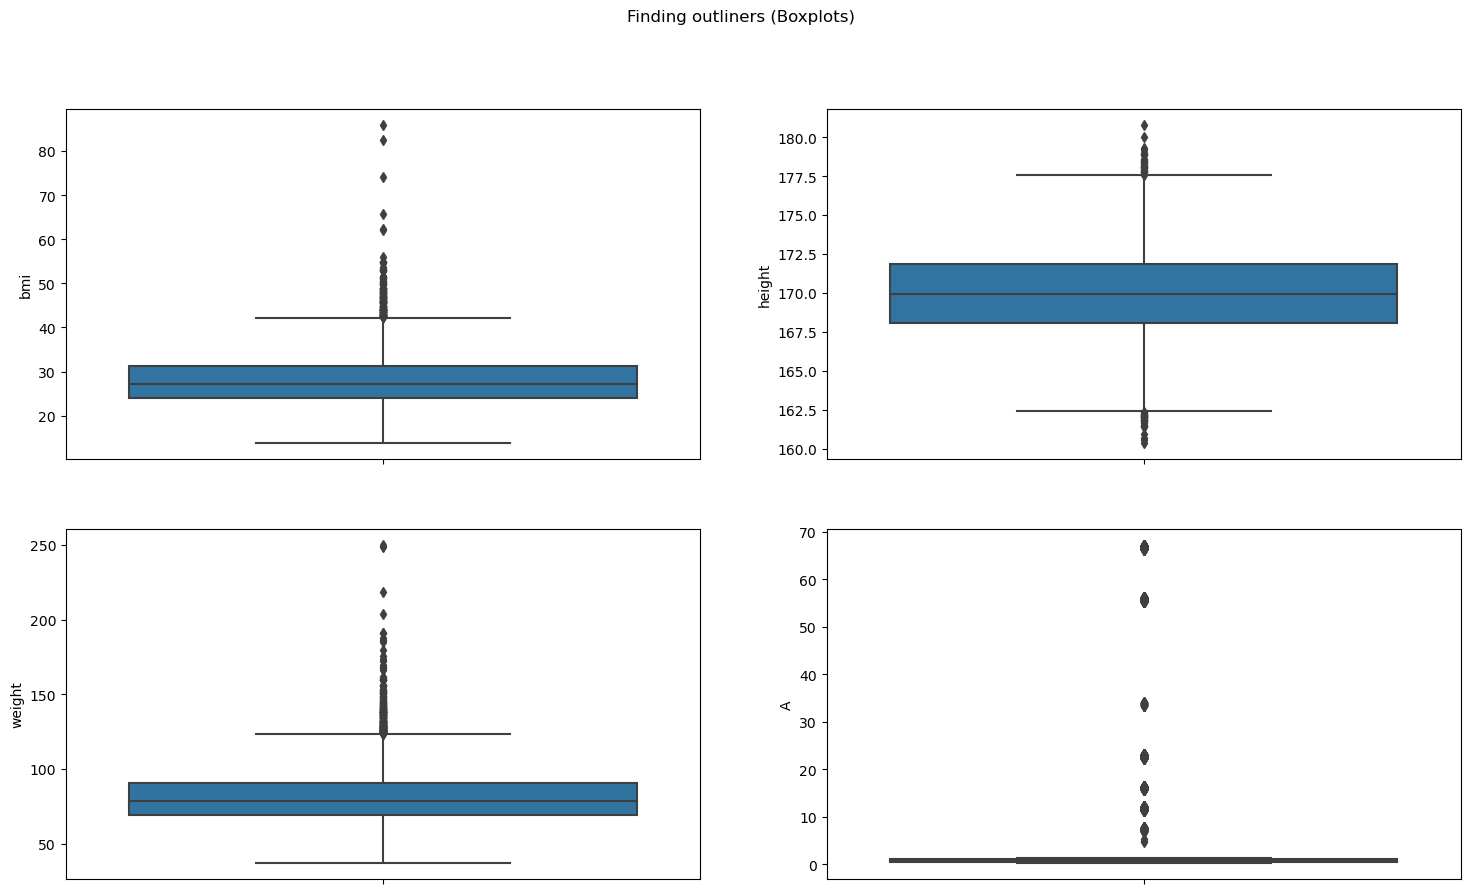

In [55]:
# Define a grid of subplots (in this case: 2 rows, 2 column)
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Finding outliners (Boxplots)')

sns.boxplot(ax=axes[0, 0], data=df, y='bmi')
sns.boxplot(ax=axes[0, 1], data=df, y='height')
sns.boxplot(ax=axes[1, 0], data=df, y='weight')
sns.boxplot(ax=axes[1, 1], data=df, y='A')

Indeed we have outliners; all our continuous features include some level of outliners (that can be seen as those dots bery far from the box of the boxplot) which we would address later during preprocess.
<br>These boxplots made us wonder if there are any outliners for the categoricals features...
<br>Outliners in categorical features are considered as classes that have very few observations, which can be easliy be spotted in a countplot.

1.3.3 To see outliners in the categorical features, we plotted each categorical feature with the count of how many times each class was assigned a value.

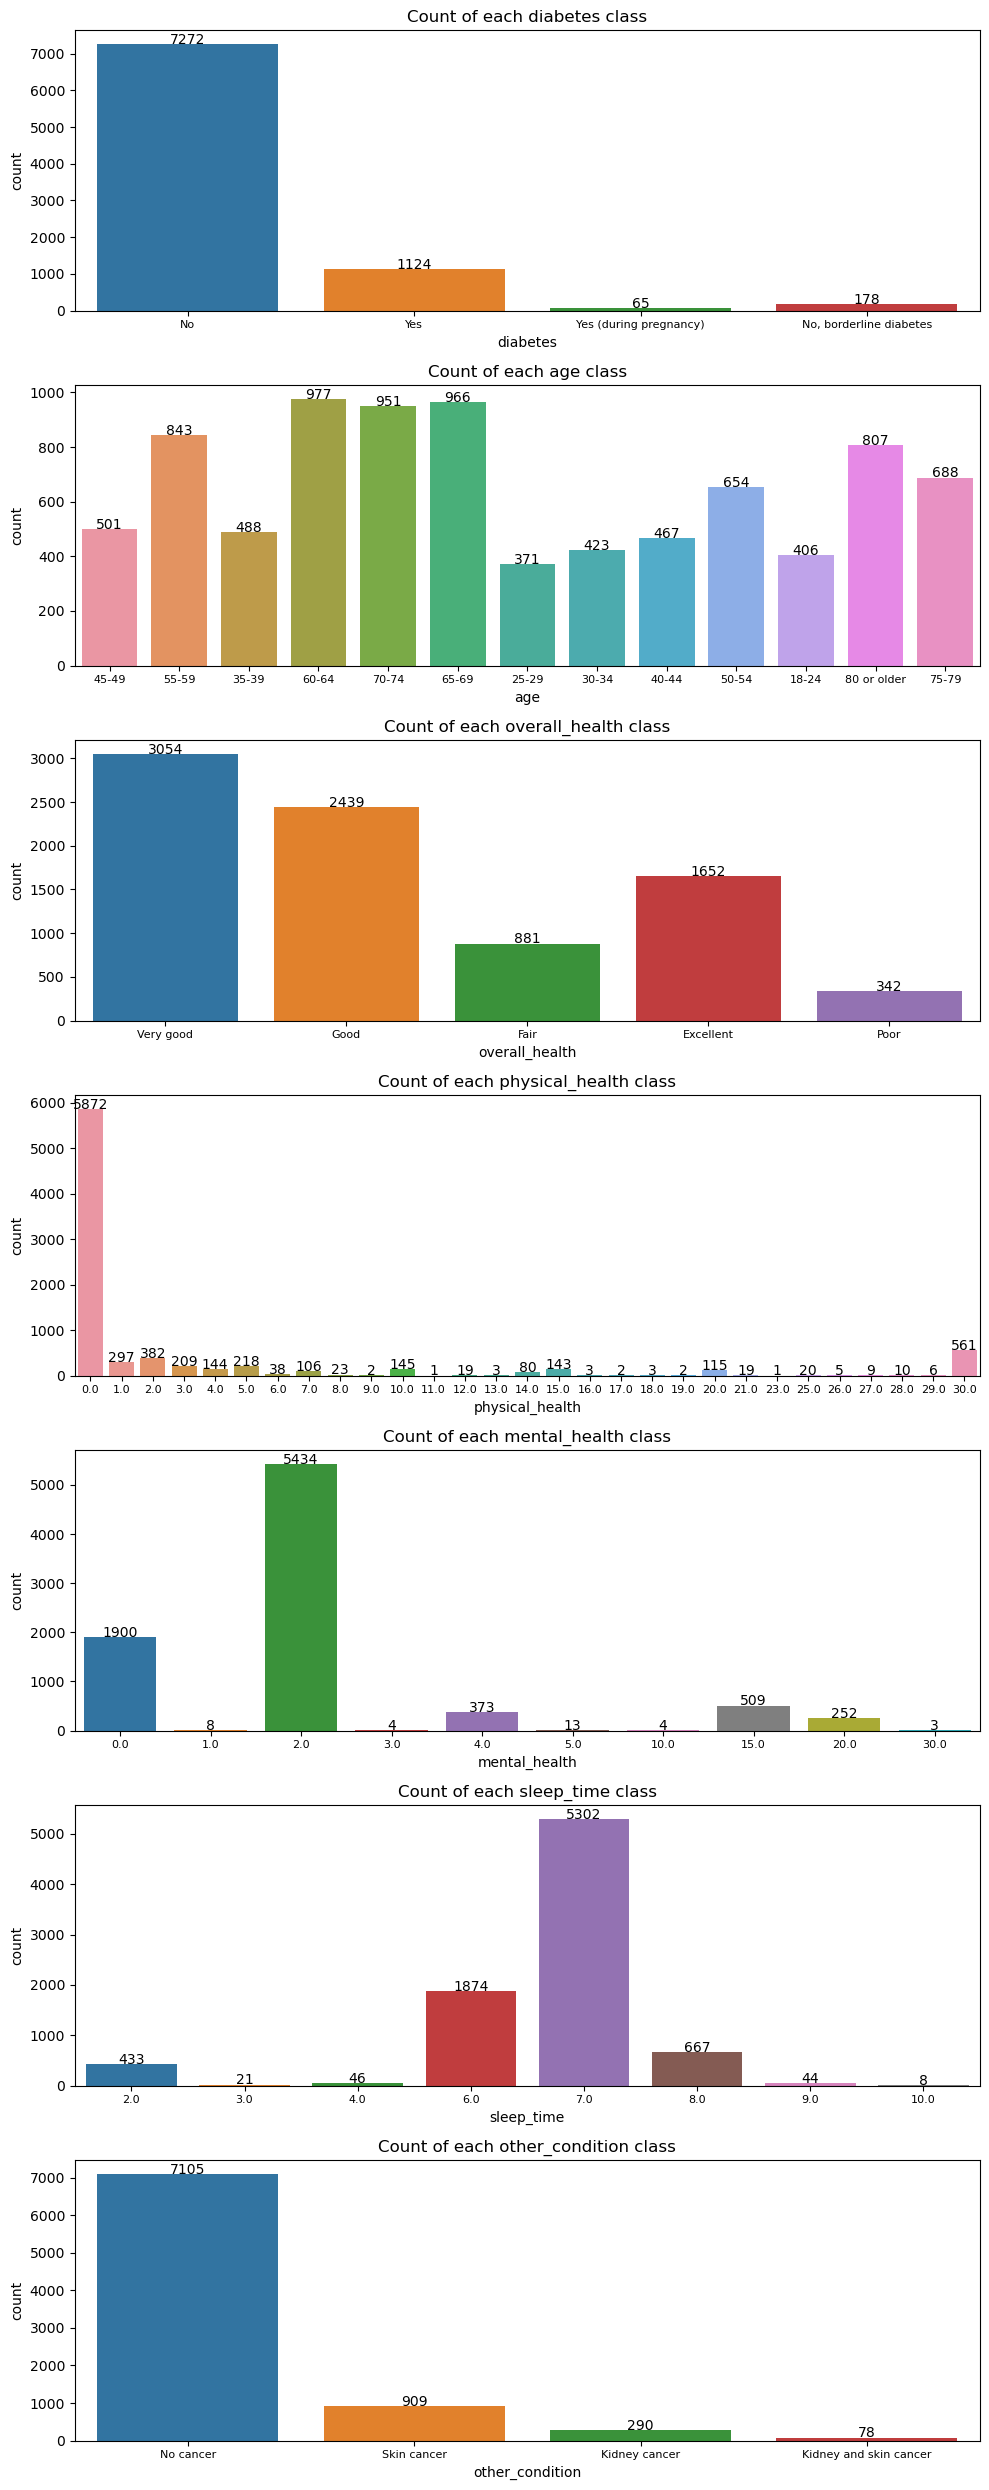

In [56]:
# Define a list of the features (column names) that we want to visualize
categorical_features = ['diabetes', 'age', 'overall_health', 'physical_health', 'mental_health', 'sleep_time', 'other_condition']

# Define a grid of subplots (in this case: 7 rows, 1 column)
fig, axes = plt.subplots(7, 1, figsize=(10, 25))

# Loop over each feature and each subplot in the figure
# 'i' is the index of the current loop iteration, 'ax' is the current subplot.
# axes.flatten() is used to convert the 2D array of subplots into a 1D array, making it easier to iterate over.
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=categorical_features[i], data=df, ax=ax)
    ax.set_title(f'Count of each {categorical_features[i]} class')
    ax.tick_params(axis='x', labelsize=8)  
    ax.set_xlabel(categorical_features[i], fontsize=10)  

    # Add counts on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 3), textcoords = 'offset points')

plt.tight_layout()
plt.show()

We can see diabetes and other_condition indeed have these kind of classes, and we want to address these; we shall do so by changing these observations classes to an existing class.
<br>We discuss this later during the preprocess section (2.2 section).

<br>1.3.4. Using histograms to see if our continuous features are from normal distribution.

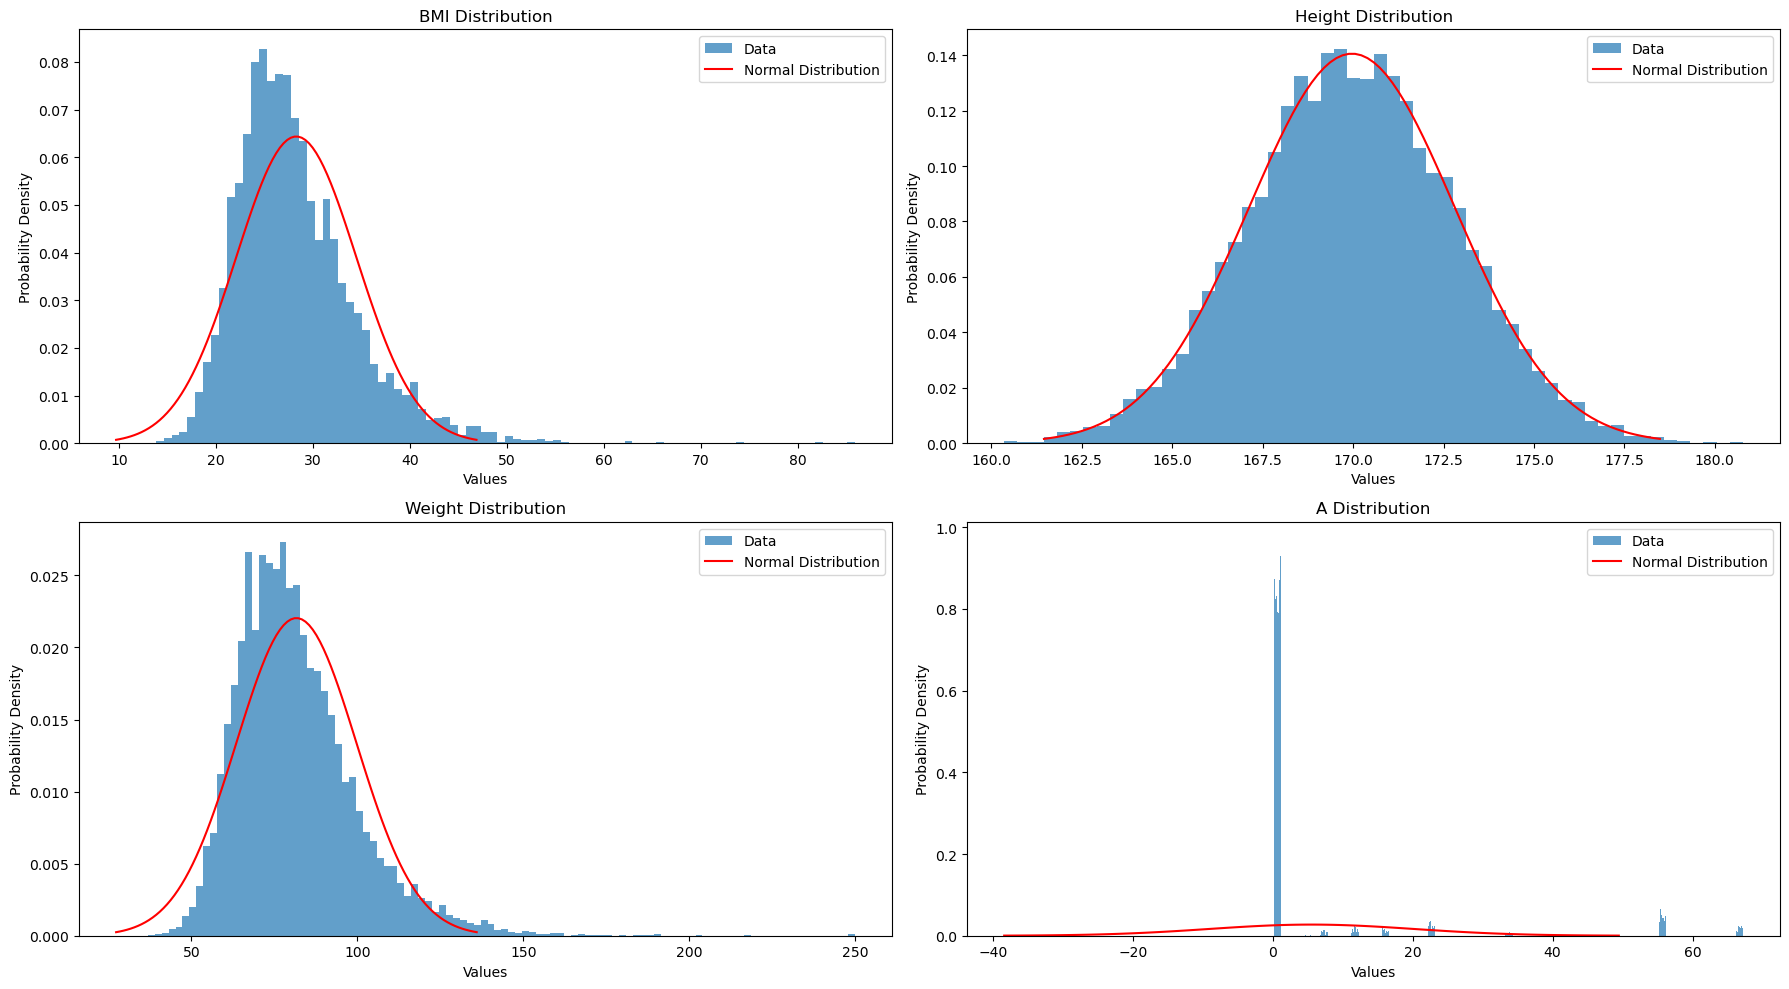

In [57]:
#Plot histogram to see if continuous features are from normal distribution

def plot_normal_distribution(data, subplot, title):
    # Get the axis object for the current subplot
    ax = axes[subplot[0], subplot[1]]

    # Plot histogram
    ax.hist(data, bins='auto', density=True, alpha=0.7, label='Data')

    # Calculate mean and standard deviation
    mu, sigma = np.mean(data), np.std(data)

    # Generate data points for the normal distribution
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    y = norm.pdf(x, mu, sigma)

    # Plot the normal distribution curve
    ax.plot(x, y, 'r', label='Normal Distribution')

    ax.set_xlabel('Values')
    ax.set_ylabel('Probability Density')
    ax.set_title(title)

    ax.legend()

# Create subplots grid
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
plot_normal_distribution(df["bmi"], (0, 0), "BMI Distribution")
plot_normal_distribution(df["height"], (0, 1), "Height Distribution")
plot_normal_distribution(df["weight"], (1, 0), "Weight Distribution")
plot_normal_distribution(df["A"], (1, 1), "A Distribution")

plt.tight_layout()
plt.show()

It's easy to see that all but feature A come from normal distribution - and this shall be helpful later on 
during preprocess, when we will wish to clean out outliners.

<br>1.3.5. Visualizing correlation with heatmaps will help us better understand the connection between features.
<br>For the correlation we used the df_enconding_with_target dataframe we created earlier.
<br> Since we have a lot of features, we decided to use diagonal correlation matrix. This way it's easier to focus on the details.

In addition, we created four other heatmaps: one for age, one for overall_health, one for other_condition and one for diabetes.
<br>The first two are string ordinal categorical features, and these heatmaps can help us better understand some connections between the different classes and see if there is behaviour we should expect - like if the correlation is getting stronger as the classes get "higher".
<br>The other two are non-ordinal categorical features which we would want to group their classes. We wish to see if there is something we should take into considiration.

C:\Users\tboostan\AppData\Local\Temp\ipykernel_17032\2785418072.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_encoding_with_target.corr()
C:\Users\tboostan\AppData\Local\Temp\ipykernel_17032\2785418072.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(df_encoding_with_target.corr())


<Axes: >

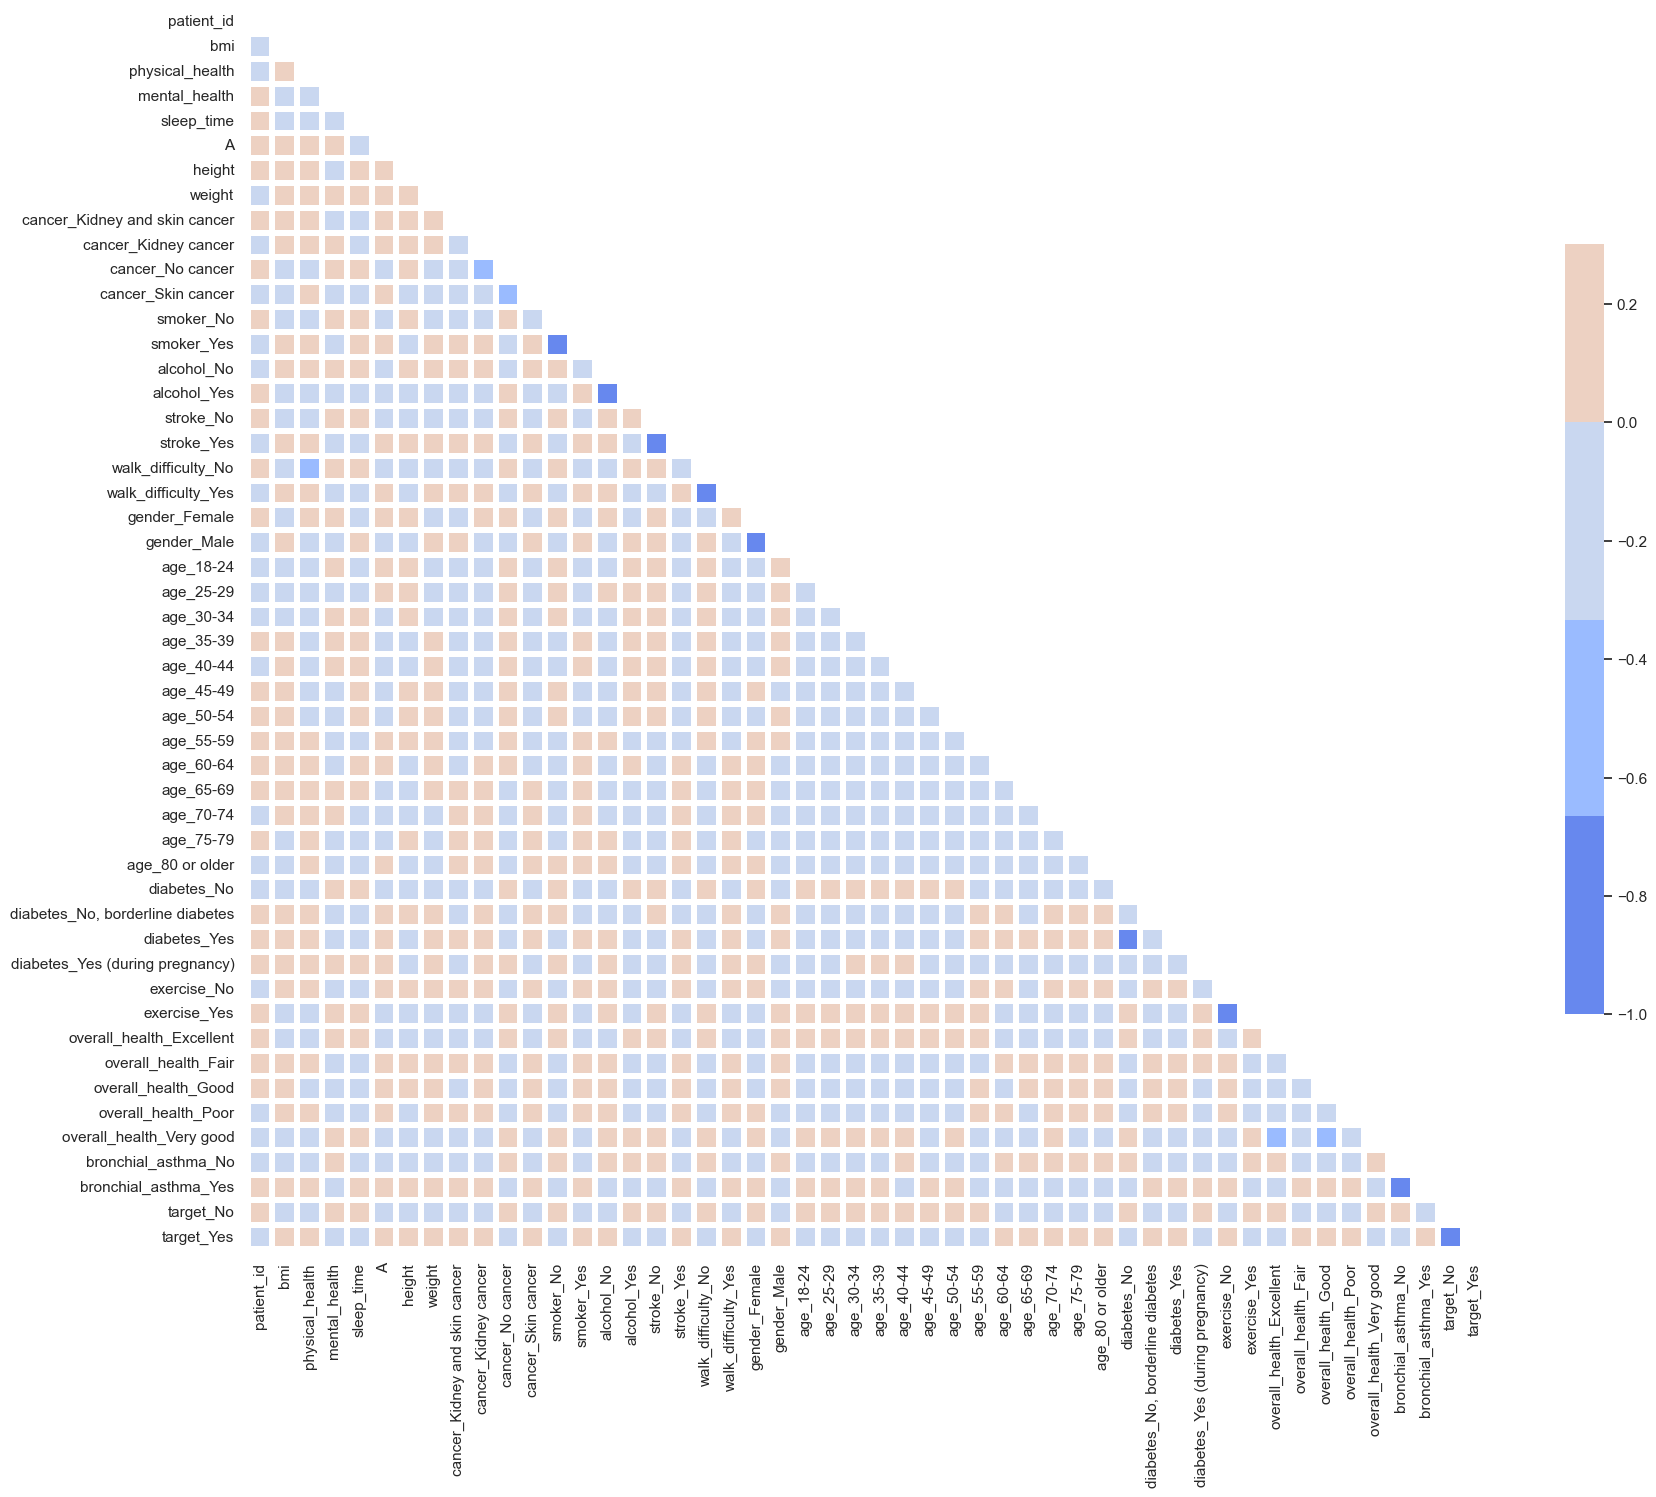

In [58]:
sns.set_theme(style="white")
corr = df_encoding_with_target.corr()
mask = np.triu(df_encoding_with_target.corr())
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("coolwarm")

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=3, cbar_kws={"shrink": .5})

<pre>
This provided us with some helpful insights, which we would divide into two section: correlation between the features 
themselves, and correlation between the features and the target feature.
Some truths about both sections:
     a. The strongets negative correlation is for binary features (smoker YES has a negative -1 correlation with smoker 
        NO, etc.). We won't address this, as this is the expected behaviour. 
     
     b. There are no features with strong positive correlation. The maximum positive correlation is around 0.25. 
     However, since we do wish to lower dimensions, we would take that into account.

<u>We would start off with correlation between the features themselves:</u> 
     a. for the other_condition feature (which was named "cancer" while doing one-hot encoding) we can clearly see that
        there is some negative correlation between kidney/skin cancer and no cancer. Considering point 3, this might be
        helpful when we will start preprocess.
        
     b. The next intersting insight is the negative correlation between walk_difficulty_NO and physical_health. We might 
        want to address this in order to lower dimensions.
     
     c. bronchial_asthma_Yes and feature A have a positive correlation to a lot other features with positive correlation 
        to the target value, such as diabetes, overall_health, etc. It's good to keep that in mind if we want to lower 
        dimensonis - as they might be good features to include in a new feature we would like to build. 
     
<u>Correlation between the features and the target:</u>
     a. No strong negative correlation between the target and any feature.
     
     b. The features which have positive correlation:
         1. BMI                        8. alcohol_No                        15. overall_health: Good-poor
         2. physical_health            9. stroke_Yes                        16. bronchial_asthma_Yes
         3. A                          10. walk_difficulty_No
         4. height                     11. gender_Male
         5. weight                     12. age: 60+
         6. all cancer types           13. diabetes: Yes and Borderline
         7. smoker_Yes                 14. exercise_No

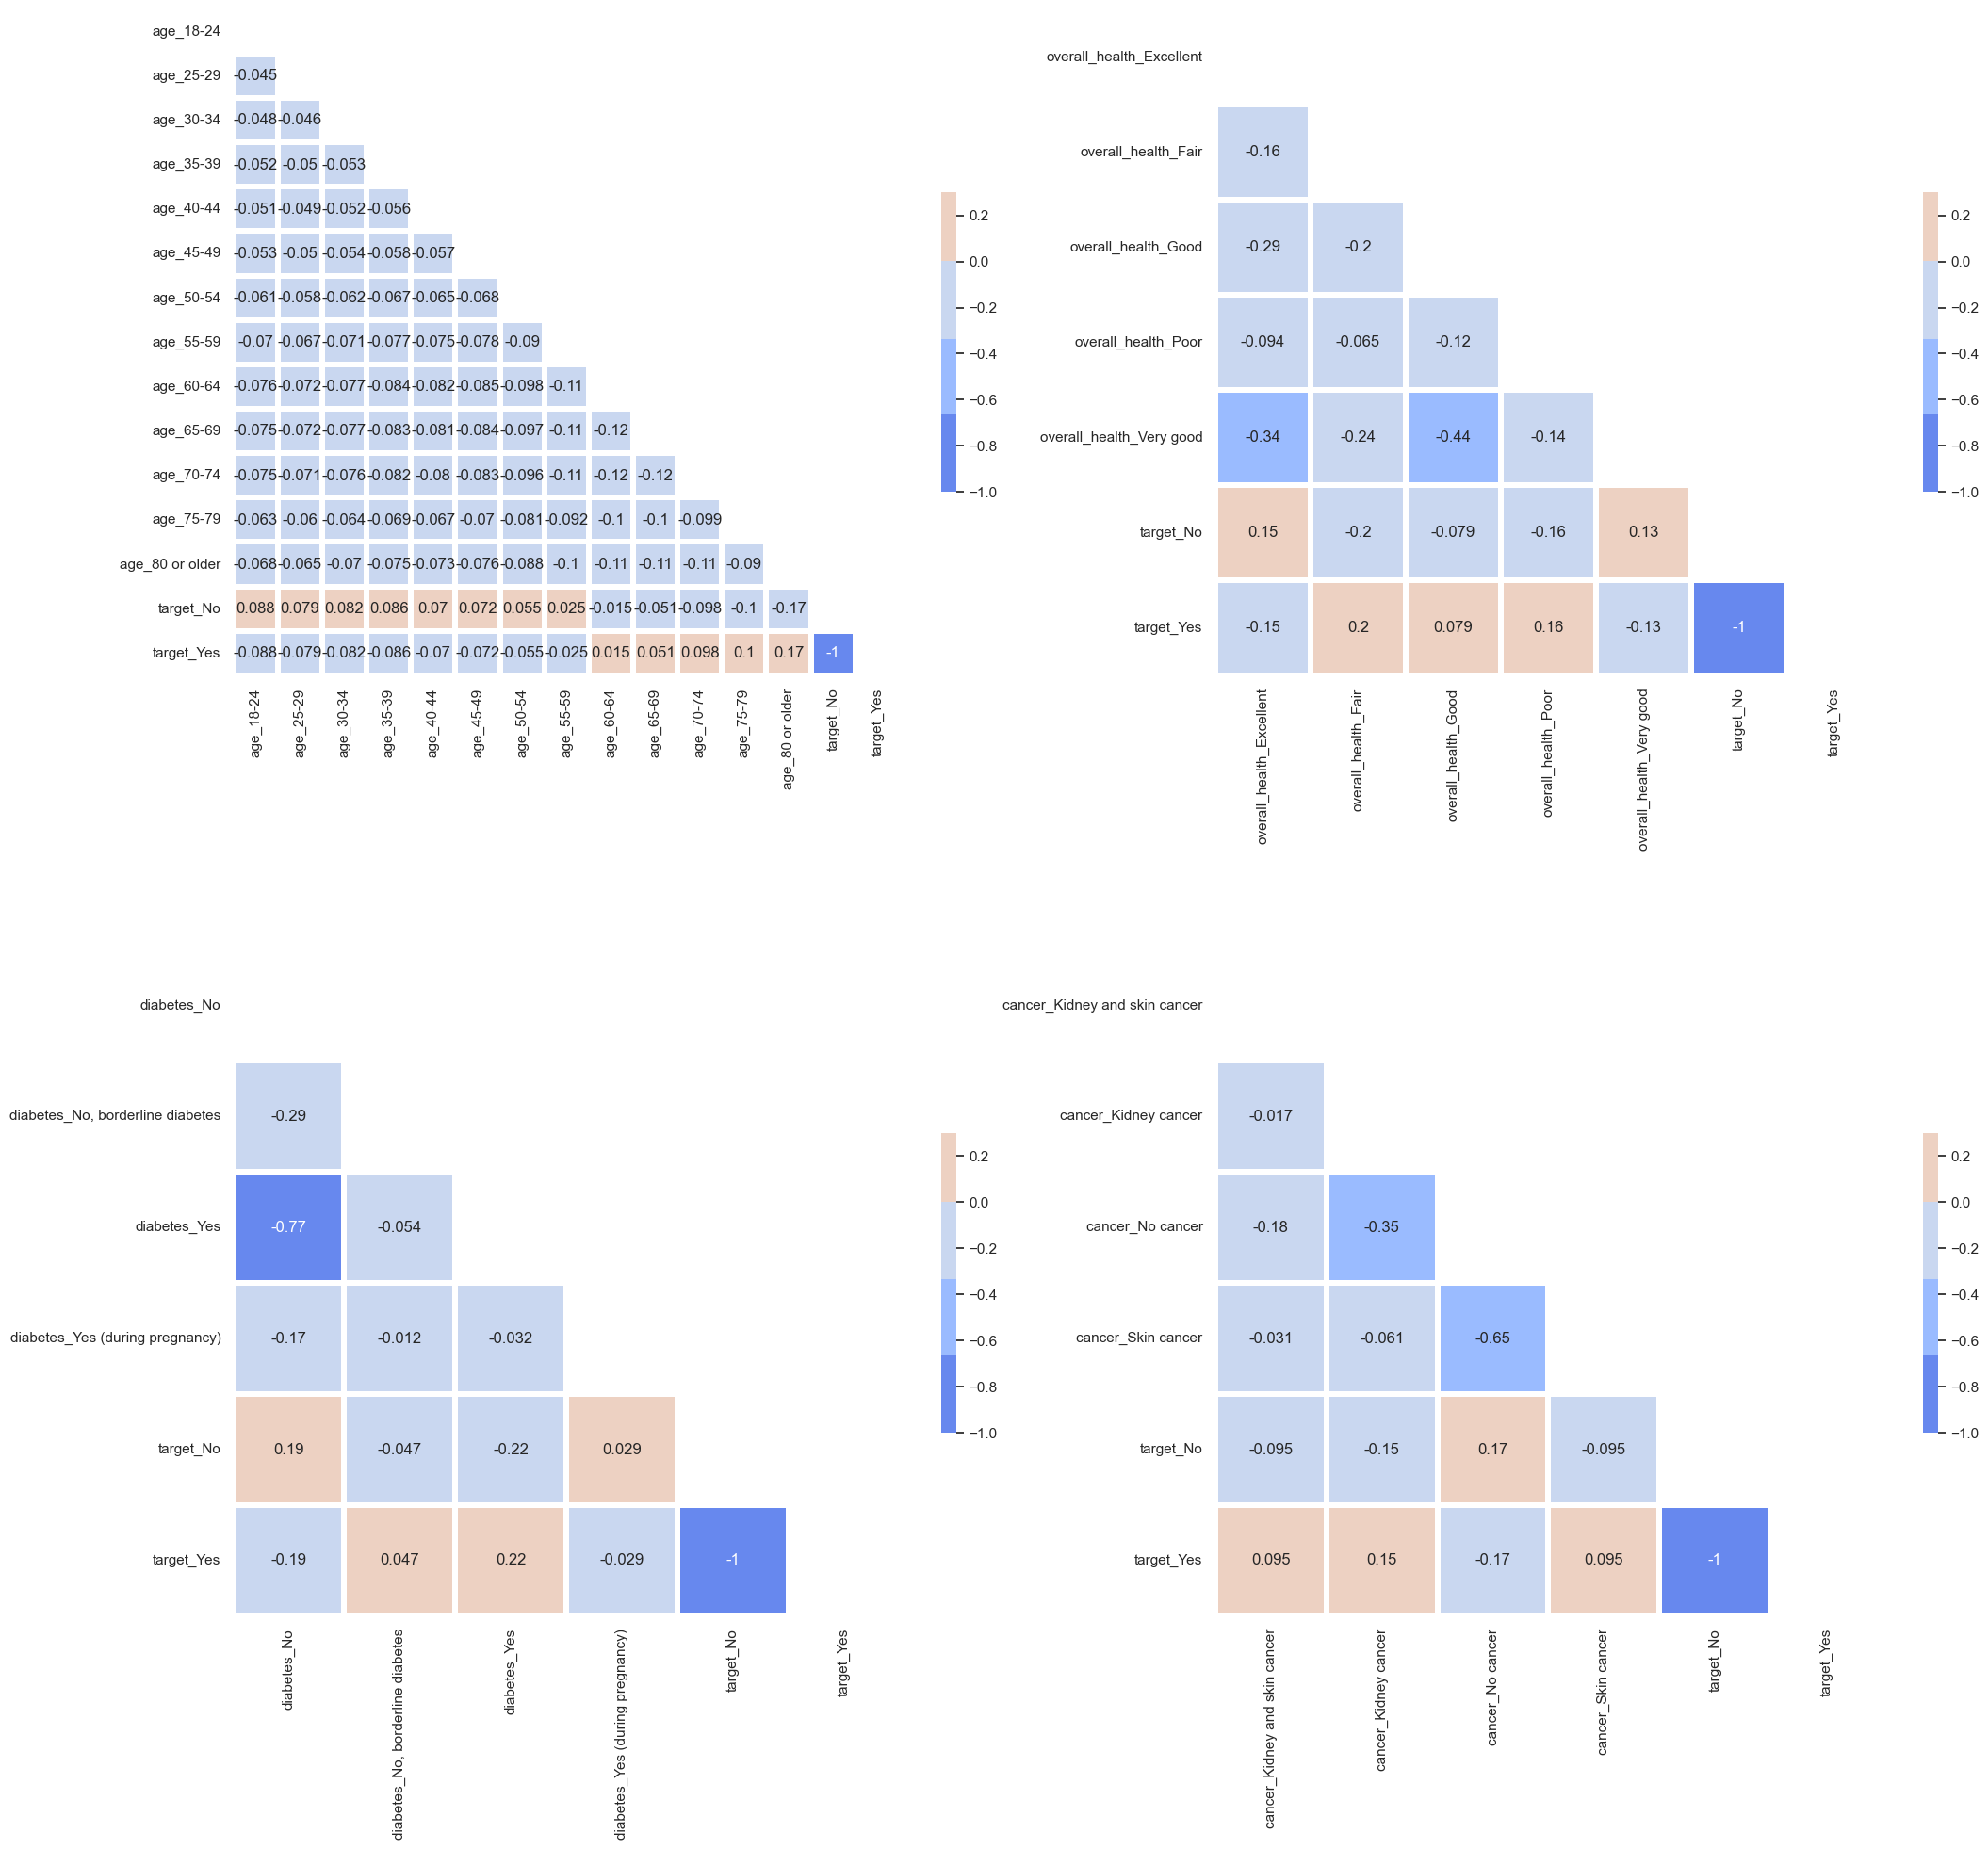

In [59]:
plt.rcParams["figure.figsize"] = [22, 22]
plt.rcParams["figure.autolayout"] = True
sns.set_theme(style="white")

corr1 = df_ordinal_age.corr()
mask1 = np.triu(df_ordinal_age.corr())
corr2 = df_ordinal_overall_health.corr()
mask2 = np.triu(df_ordinal_overall_health.corr())
corr3 = df_diabites.corr()
mask3 = np.triu(df_diabites.corr())
corr4 = df_cancer.corr()
mask4 = np.triu(df_cancer.corr())

cmap = sns.color_palette("coolwarm")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(wspace=0.01)

sns.heatmap(corr1, mask=mask1, cmap=cmap, vmax=.3, center=0, square=True, linewidths=3, cbar_kws={"shrink": .3}, ax=ax1, annot=True)
sns.heatmap(corr2, mask=mask2, cmap=cmap, vmax=.3, center=0, square=True, linewidths=3, cbar_kws={"shrink": .3}, ax=ax2, annot=True)
sns.heatmap(corr3, mask=mask3, cmap=cmap, vmax=.3, center=0, square=True, linewidths=3, cbar_kws={"shrink": .3}, ax=ax3, annot=True)
sns.heatmap(corr4, mask=mask4, cmap=cmap, vmax=.3, center=0, square=True, linewidths=3, cbar_kws={"shrink": .3}, ax=ax4, annot=True)

fig.subplots_adjust(wspace=0.001)
plt.show()

<pre>
<b>overall_health and age:</b>
Theses two features are more intersting since they're ordinal string features (while the rest of the ordinal features are numerical). Understanding the correlation between strings classes is harder than numerical, and these heatmaps helps us to do just that.
     a. For the overall_health feature, we can see some negative correlation between "Excellent", "Very good" and 
        "Good", while the target "divides" this feature to "Excellent"+"Very good" (negative correlation to the target) 
        and the rest.
        It is also intersting to see (though hard... sorry for that. please zoom in to see) that there is indeed some
        match between the ordinal order and their correlation to the target value: in general, the worst health the 
        patient indicated his health to be - there was a strong correlation to the target.
        
     b. For the age feature, we can clearly see a nice match between the ordinal order and their correlation to the 
        target. In general, the older the patient is - the higher to correlation.

7. <b>other_condition and diabetes:</b>
We wished to see the correlation of between the different classes of other_condition and diabetes.
We did so to see how the different classes correlate with each other, so maybe when we preprocess we will make a smarter
decision. 
unexpectedly (or maybe not?), we don't see a positive correlation between different kinds of cancer. But what we do see
- is that there is a stronger negative correlation between 'No cancer' and all cancer types than there is between
the cancer types themselves. That would be good enough for us to group them together to create a nice informative 
classes.
Regarding diabetes - we found official health websites that connect between the different classes of diabetes (more on
that in the written assigment). That would be sufficient enough for us to group them together.

------------------------------------------------------------------------------------------------------------------------

# Section 2: Preprocess

In this section, we shall answer the questions from the project file and explain how we decided to handle the problems:
1. Dealing with missing values.
2. Dealing with outliners.
3. Dealing with categorical & binary features.
4. Normalizing the features.
5. Dimensions Addressing (lowering & building new features).
6. Preforming preprocess on the test set.

## 2.1 Dealing with missing values

Our goal is to fill out as many missing values as possible without damaging the data.
We choose this way instead of just deleting rows with missing values since we want to keep the dataset as large as possible, so our model would be more fitted.

In [60]:
# First we need to understand how many missing values each feature have
df.isnull().sum()

patient_id                0
bmi                    3546
smoker                  449
alcohol                 555
stroke                  335
physical_health         562
mental_health           500
walk_difficulty         516
gender                  321
age                     458
diabetes                361
exercise                556
overall_health          632
sleep_time              605
bronchial_asthma        305
A                       357
other_condition         618
height                   18
weight                   17
respiratory_failure       0
dtype: int64

<br><b><u>Some thoughts:</b></u>
1. BMI has the most missing values, and even so it sums up only to 39.4% (3546 divided by 9000). This means we can't reduce the dimensions of the problem by removing features, but we have to impute missing values.
<br><br>
2. Luckly, BMI is a very easy feature to fill out as a simple google search shows what is the formula to calculate BMI using height and weight.
<br>We will address few different options for a row to have:
<br>a. <b>{bmi, height, weight} all have missing values:</b> we will compute the average height and weight of the dataset and enter it as the values for this row. We will compute the BMI using these values.
<br>b. <b>{weight/height, bmi} both have missing values:</b> we will compute the average of the missing value (height or weight) and compute the BMI using this average and the real data we got.
<br>c. <b>{weight/height/bmi} is the only missing value:</b> we will compute the missing value using the other two.
<br>d. <b>{weight, height} both are missing, but there is value for BMI:</b> we can't compute the height or weight from that. If such thing happens, we will consider dropping either/both columns.
<br><br>
3. We can fill out <b>A</b> feature using the <b>mean value</b> of the feature - a very common method to fill out missing values for continuous features.
<br><br>
4. We are still left with a bit too much of missing values to fill.
<br>We decdied to remove all rows that had at <b>least 3 missing values</b> - as in our opinion these rows have too much missing data and completing it in different methods might result in a less accurate model and therefore might not be the right thing to do.
<br>This action removed us an extra 347 rows.
<br><br>
5. Now we are left only with categorical and binary features.
<br>We will deal with those later on in section 2.4, but in a nutshell: we will use <b>one-hot encoding</b>, which also deals with NaN values be represting them as a vector of 0. In accordance to using one-hot encoding, when dealing with binary features and ordinal categorical features, we will fill out missing values with 0.

In [61]:
# Creating a function to calculate BMI, height or weight for missing values
def fill_missing_values(df):
    for index, row in df.iterrows():
        # Missing values in all three columns: ['bmi', 'height', 'weight']
        if pd.isnull(row['bmi']) and pd.isnull(row['height']) and pd.isnull(row['weight']):
            avg_height = df['height'].mean()
            avg_weight = df['weight'].mean()
            df.at[index, 'height'] = avg_height
            df.at[index, 'weight'] = avg_weight
            df.at[index, 'bmi'] = round(avg_weight/(avg_height/100)**2, 2)
        
        # Missing values in 'bmi' and 'height' columns, but has values in 'weight' column
        elif pd.isnull(row['bmi']) and pd.isnull(row['height']) and not pd.isnull(row['weight']):
            avg_height = df['height'].mean()
            df.at[index, 'height'] = avg_height
            df.at[index, 'bmi'] = round(row["weight"]/(avg_height/100)**2, 2)
        
        # Missing values in 'bmi' and 'weight' columns, but has values in 'height' column
        elif pd.isnull(row['bmi']) and not pd.isnull(row['height']) and pd.isnull(row['weight']):
            avg_weight = df['weight'].mean()
            df.at[index, 'weight'] = avg_weight
            df.at[index, 'bmi'] = round(avg_weight/(row['height']/100)**2, 2)
            
        # Missing value in 'bmi' column, but has values in 'height' and 'weight' columns    
        elif pd.isnull(row['bmi']) and not pd.isnull(row['height']) and not pd.isnull(row['weight']):
            df.at[index, 'bmi'] = round(row["weight"]/(row["height"]/100)**2, 2)
                                        
        # Missing value in 'weight' column, but has values in 'bmi' and 'height' columns                                
        elif not pd.isnull(row['bmi']) and not pd.isnull(row['height']) and pd.isnull(row['weight']):
            df.at[index, 'weight'] = round(row['bmi']*((row['height'] / 100) ** 2))
            
        # Missing value in 'height' column, but has values in 'bmi' and 'weight' columns
        elif not pd.isnull(row['bmi']) and pd.isnull(row['height']) and not pd.isnull(row['weight']):
            df.at[index, 'height'] = round((row['weight'] / row['bmi']) ** 0.5, 2)
            
    return df

# Executing the function
df = fill_missing_values(df)

#--------

# Filling out A using its mean value
df["A"] = df["A"].fillna(df["A"].mean())

#--------

# Sums missing values for each row
missing_values_count = df.isnull().sum(axis=1)
print(f"How many rows are there with at least 3 missing values: \n {missing_values_count[missing_values_count >= 3].value_counts().sum()} \n")

# Drops these rows with at least 3 missing values
df = df.dropna(thresh=df.shape[1] - 3 + 1)

#--------

print(f"How many missing values we still have: \n{df.isnull().sum()} \n")
print(f"DF shape: {df.shape} \n")

How many rows are there with at least 3 missing values: 
 347 

How many missing values we still have: 
patient_id               0
bmi                      0
smoker                 369
alcohol                471
stroke                 267
physical_health        464
mental_health          406
walk_difficulty        423
gender                 260
age                    366
diabetes               302
exercise               457
overall_health         513
sleep_time             517
bronchial_asthma       226
A                        0
other_condition        505
height                   0
weight                   0
respiratory_failure      0
dtype: int64 

DF shape: (8653, 20) 



<center>---------------------------------------------</center>

## 2.2 Dealing with outliners

As discussed in section 1.3 and was shown using boxplots, countplots and describe function - our data does include outliners for the continuous and categorical features. 
<br><u>Continous features:</u> All continous features but A come from normal distribution - and therefore we decdied to deal with them using <b>data deviation.</b> For that, we use the threshold 3; it is widely used in data deviation, and since we aren't going to remove anymore rows from now on - it's OK to have a little more "strict" threshold. 
<br><u>Categorical features:</u> we decdied to treat outliners only from other_condition and diabetes features, even though we can see outliners in physical_health, mental_health and sleep_time as well. The reason lies whitin how we will treat our categorical features later on, which will group together few classes from physical_health, mental_health and sleep_time and therefore won't need us to remove outliners.
<br>We have decided to turn both of these features to binary features: Cancer/No cancer (all cancer types will turn into "Cancer") and Yes/No (all diabetes + borderline turn into "Yes"), respectively.
<br>As we saw in the correlation matrix, there was some correlation between these classes we decdied to group, and we even managed to find a study that supports our decision (we bring it in the written assigment).

We decdied to remove outliners based on <b>a single column</b>; that means we will remove a row if it has an outliner in at least one of these columns. We decided to do so in order to remove as much outliners as possible - so scaling will be more accurate.

<u><b>Please note:</b></u> We tried to deal with outliners before we dealt with missing values, but since there were so many missing values for the continuous features, we got a TypeError. Therefore we dealt with these missing values first

In [62]:
df = df[(np.abs(stats.zscore(df[['bmi', 'A', 'height', 'weight']])) < 3).all(axis=1)]
df['other_condition'] = df['other_condition'].apply(lambda x: 'Cancer' if pd.notna(x) and x != 'No cancer' else x)
df['diabetes'] = df['diabetes'].replace({'No, borderline diabetes': 'Yes', 'Yes (during pregnancy)': 'Yes'})


print(f"How many missing values we still have: \n{df.isnull().sum()} \n")
print(f"DF shape: {df.shape} \n")

How many missing values we still have: 
patient_id               0
bmi                      0
smoker                 341
alcohol                419
stroke                 250
physical_health        433
mental_health          382
walk_difficulty        385
gender                 243
age                    342
diabetes               277
exercise               415
overall_health         480
sleep_time             477
bronchial_asthma       213
A                        0
other_condition        461
height                   0
weight                   0
respiratory_failure      0
dtype: int64 

DF shape: (8003, 20) 



<center>---------------------------------------------</center>

## 2.3 Dealing with categorical features & binary features

Idially, we would have used KNN to fill out those missing values as it might have provided us with a more accurate data filling.
<br>We learned that KNN can also be used as classifier model, and since categorical features are somewhat classified features - we thought that is a good idea.
<br>However, while searching the web to see how we should do that, we learned that KNNImputer (the one to be used for imputing missing values) is not meant for categorical features. That is since KNNImputer is specifically designed for imputing missing values in numerical features, which means it would treat categorical features as continuous and may produce imputations that don't make sense in the context of the categorical features.
<br>Therefore, we decided on different methods.

In addition, we decdied <b>NaN values will get 0</b>.
<br>This was done thinking about one very common method to treat categorical features - one-hot encoding. In one-hot encoding, all classes become features, and the row is assigned 0 if it wasn't in that class - meaning, NaN values create a vector of 0 for new features driven from a single categorical feature.
<br>We figured we could take that and use it in our dataset as well, even though we don't use one-hot encoding (as explained below).

### 2.3.1 Dealing with non-ordinal categorical features
Originally, we had two non-ordinal features are: diabetes and other_condition.
<br>However, since we decdied to group classes for these features, they became binary features and we are left with zero non-ordinal features.
<br>So, nothing to show here :)

### 2.3.2 Dealing with ordinal categorical features
The "higher" the class (older age, more sleep hours, etc.) - the higher the set value is.
<br>Our ordinal features are: physical_health, mental_health and sleep_time, age and overall_health.

In [63]:
age_dict = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7, 
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13}

overall_health_dict = {
    'Excellent': 1,
    'Very good': 2,
    'Good': 3,
    'Fair': 4,
    'Poor': 5}


# For categorical features {physical_health, mental_health, sleep_time} - instead of overwritting existing columns, we will create new ones.
# This is so we can prevent the data from being corrupted if we accidentally (or not...) run this code more than once
# (which will cause all values in every column to become of one value only)

# Creating a function for physical_health per the stated above
def values_from_0_to_30(x):
    if (x >= 0) and (x <= 10):
        return 1
    elif (x > 10) and (x <= 20):
        return 2
    elif (x > 20) and (x <= 30):
        return 3
    elif pd.isna(x):
        return 0

# Creating a function for sleep_time per the stated above 
def values_from_o_to_10(x):
    if (x >= 0) and (x <= 3):
        return 3
    elif (x > 3) and (x <= 7):
        return 2
    elif (x > 7) and (x <= 10):
        return 1
    elif pd.isna(x):
        return 0

# Creating a function for age
def age_to_num(x):
    if pd.isna(x):
        return 0
    else:
        return age_dict[x]
    
# Creating a function for overall_health
def overall_health_to_num(x):
    if pd.isna(x):
        return 0
    else:
        return overall_health_dict[x]

# Applying the functions
df["physical_health_levels"] = df["physical_health"].apply(values_from_0_to_30)
df["mental_health_levels"] = df["mental_health"].apply(values_from_0_to_30)
df["sleep_time_levels"] = df["sleep_time"].apply(values_from_o_to_10)
df['age'] = df['age'].apply(age_to_num)
df['overall_health'] = df['overall_health'].apply(overall_health_to_num)

# Removing original columns
df = df.drop(["physical_health", "mental_health", "sleep_time"], axis=1)

df.head()

,patient_id,bmi,smoker,alcohol,stroke,walk_difficulty,gender,age,diabetes,exercise,overall_health,bronchial_asthma,A,other_condition,height,weight,respiratory_failure,physical_health_levels,mental_health_levels,sleep_time_levels
0,0,27.60,No,No,No,No,Male,6,No,Yes,2,Yes,0.622919,No cancer,163.938380,74.177187,No,1,1,2
1,1,26.63,No,No,No,No,Female,8,No,Yes,3,No,0.446440,Cancer,171.622612,78.436857,No,1,2,2
2,2,26.61,Yes,No,No,No,Female,8,No,Yes,2,No,0.745457,No cancer,174.553051,81.077391,No,1,1,2
3,3,26.57,No,No,No,No,Female,4,No,Yes,0,No,0.534084,No cancer,170.930284,77.629999,No,1,1,2
4,4,32.77,Yes,No,No,No,Female,8,No,Yes,2,No,1.138659,No cancer,168.399031,92.929932,No,1,1,2


### 2.3.3 Dealing with binary features
We should also address all the binary features we have and assign 0 or 1 to their classes.
<br>Class "Yes" will be assigned as 1 and class "No" will be assigned as 0.
<br>For gender feature: "Male" class = 1, 0 otherwise.
<br>For other_condition feature: "Cancer" class = 1, 0 otherwise.
<br>We are going to change the represntation of the target column from "Yes"/"No" to 1/0 as well. 

In [64]:
# Dealing with Binary features

binary_features = ['smoker', 'alcohol', 'stroke', 'walk_difficulty', 'gender', 'exercise', 'bronchial_asthma', 
                  'other_condition', 'diabetes']

# Creating a function to turn YES values to 1 and 0 otherwise.
def yes_to_1(x):
    if x == "Yes" or x == 1 or x == "Male" or x == "Cancer":
        return 1
    elif x == "No" or x == 0 or x == "Female" or x == "No cancer" or pd.isna(x):
        return 0

# Applying function
for feature in binary_features:
    df[feature] = df[feature].apply(yes_to_1)

df['respiratory_failure'] = df['respiratory_failure'].apply(yes_to_1)

df.head()

,patient_id,bmi,smoker,alcohol,stroke,walk_difficulty,gender,age,diabetes,exercise,overall_health,bronchial_asthma,A,other_condition,height,weight,respiratory_failure,physical_health_levels,mental_health_levels,sleep_time_levels
0,0,27.60,0,0,0,0,1,6,0,1,2,1,0.622919,0,163.938380,74.177187,0,1,1,2
1,1,26.63,0,0,0,0,0,8,0,1,3,0,0.446440,1,171.622612,78.436857,0,1,2,2
2,2,26.61,1,0,0,0,0,8,0,1,2,0,0.745457,0,174.553051,81.077391,0,1,1,2
3,3,26.57,0,0,0,0,0,4,0,1,0,0,0.534084,0,170.930284,77.629999,0,1,1,2
4,4,32.77,1,0,0,0,0,8,0,1,2,0,1.138659,0,168.399031,92.929932,0,1,1,2


<center>---------------------------------------------</center>

### Some ground check
After all these operations, we should be left with 0 NaN values and can move on.
<br>We will check that just to make sure:

In [65]:
df.isnull().sum()

patient_id                0
bmi                       0
smoker                    0
alcohol                   0
stroke                    0
walk_difficulty           0
gender                    0
age                       0
diabetes                  0
exercise                  0
overall_health            0
bronchial_asthma          0
A                         0
other_condition           0
height                    0
weight                    0
respiratory_failure       0
physical_health_levels    0
mental_health_levels      0
sleep_time_levels         0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8003 entries, 0 to 8999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patient_id              8003 non-null   int64  
 1   bmi                     8003 non-null   float64
 2   smoker                  8003 non-null   int64  
 3   alcohol                 8003 non-null   int64  
 4   stroke                  8003 non-null   int64  
 5   walk_difficulty         8003 non-null   int64  
 6   gender                  8003 non-null   int64  
 7   age                     8003 non-null   int64  
 8   diabetes                8003 non-null   int64  
 9   exercise                8003 non-null   int64  
 10  overall_health          8003 non-null   int64  
 11  bronchial_asthma        8003 non-null   int64  
 12  A                       8003 non-null   float64
 13  other_condition         8003 non-null   int64  
 14  height                  8003 non-null   

<center>---------------------------------------------</center>

## 2.4 Normalizing the features (Scaling)

After removing our outliners and assigning numerical values to all features - we can scale our data.
<br><u> Scaling is important for few reasons:</u>
<br> 1. If we'd like to use models based on Eucldean distance (like KNN) - we should scale so that all our features will contribute equally.
<br> 2. Gardient based algorithms that we might use later on (logistic regression, SVM, etc.) will optimize much faster.
<br> 3. So we can use PCA to reduce the dimensions. PCA maximizes the variance of the features, therefore we want all features on the same scale.

<br>Even though it seems our data comes from normal distribution, using describe function (section 1.3) showed the mean and std aren't close to 0 and 1.
<br>We shall check our data now after removing outliners to decide:

In [67]:
df.describe()

,patient_id,bmi,smoker,alcohol,stroke,walk_difficulty,gender,age,diabetes,exercise,overall_health,bronchial_asthma,A,other_condition,height,weight,respiratory_failure,physical_health_levels,mental_health_levels,sleep_time_levels
count,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000
mean,4509.557791,27.888732,0.422217,0.065350,0.044358,0.131451,0.479570,7.705610,0.145196,0.750469,2.246658,0.123329,2.091680,0.142821,169.953775,80.574753,0.148944,1.117081,1.035612,1.856054
std,2607.873445,5.485094,0.493944,0.247159,0.205903,0.337914,0.499614,3.777133,0.352320,0.432769,1.156634,0.328835,4.635957,0.349913,2.813789,16.068725,0.356056,0.596299,0.361350,0.587738
min,0.000000,13.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240265,0.000000,161.478331,36.873485,0.000000,0.000000,0.000000,0.000000
25%,2229.500000,23.960000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.523608,0.000000,168.053160,68.914170,0.000000,1.000000,1.000000,2.000000
50%,4540.000000,27.120000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.802799,0.000000,169.908655,78.433259,0.000000,1.000000,1.000000,2.000000
75%,6772.500000,31.170000,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,1.000000,3.000000,0.000000,1.087837,0.000000,171.867822,90.040074,0.000000,1.000000,1.000000,2.000000
max,8999.000000,46.790000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000,5.000000,1.000000,34.233280,1.000000,178.415007,136.000349,1.000000,3.000000,3.000000,3.000000


As we can see, besides the binary features, our data isn't scaled.
We shall use MinMax Scaling, as there isn't much sense in having a negative BMI, height or wright scores (which Z-score can create). In addition, A feature didn't have any negative values to begin with as well - therefore we might want to keep it that way.

In [68]:
features_to_scale = ['bmi', 'A', 'height', 'weight', 'age', 'overall_health', 'physical_health_levels', 'mental_health_levels', 'sleep_time_levels']

# Apply Min-Max scaling to continuous features
scaler = MinMaxScaler() # Create an instance of MinMaxScaler
scaler.fit(df[features_to_scale]) # Fit the scaler on the dataset

# Transform the dataset using the fitted scale
df[features_to_scale] = scaler.transform(df[features_to_scale])

df.head()

,patient_id,bmi,smoker,alcohol,stroke,walk_difficulty,gender,age,diabetes,exercise,overall_health,bronchial_asthma,A,other_condition,height,weight,respiratory_failure,physical_health_levels,mental_health_levels,sleep_time_levels
0,0,0.419540,0,0,0,0,1,0.461538,0,1,0.4,1,0.011257,0,0.145250,0.376323,0,0.333333,0.333333,0.666667
1,1,0.390200,0,0,0,0,0,0.615385,0,1,0.6,0,0.006065,1,0.598953,0.419295,0,0.333333,0.666667,0.666667
2,2,0.389595,1,0,0,0,0,0.615385,0,1,0.4,0,0.014862,0,0.771977,0.445933,0,0.333333,0.333333,0.666667
3,3,0.388385,0,0,0,0,0,0.307692,0,1,0.0,0,0.008644,0,0.558076,0.411155,0,0.333333,0.333333,0.666667
4,4,0.575923,1,0,0,0,0,0.615385,0,1,0.4,0,0.026429,0,0.408622,0.565502,0,0.333333,0.333333,0.666667


## 2.5 Dimensions Addressing

As we already seen on [1.1: Initial understanding of the data](#1.1-Initial-understanding-of-the-data) section, the inital dataset included 17 different features - meaning it had 17 dimensions.
<br>After all the preprocess up to this point, we still managed to stay on 17 dimensions, but it is still considered a lot of dimensions.

<b><u>Problems with large number of dimensions:</b></u>
<br>1. <u>Curse of dimensionality:</u> high dimensions dataset could lead to sparsity of data, where the avaliable data points become sparse in the high dimensional space (since as the number of dimensions increases, the volume of the feature space grows exponentially). Sparse data makes it difficult to find patterns and build accurate models.
<br><br>
2. <u>Needed computational resources:</u> the higher the dimensions number - the higher the computational resources (time, memory, etc.) needed to work with it. Most algorithms scale poorly with the number of features, resulting in longer training times and increased computational costs.
<br><br>
3. <u>Overfitting:</u> the higher the dimensions number - the more prone to overfitting the model is. As we said, sparse data makes it difficult to find patterns (and finding patterns is what we really aim to in ML) - and therefore the model tends to overfit itself instead of learning patterns.
<br><br>


Therefore, we sure do want to lower our dimensions. If needed, we will create new features afterwards.

<br><b><u>We will do so using PCA:</b></u> Principal Component Analysis (PCA) computes the principal components by finding linear combinations of the original features that capture the maximum amount of variance in the data, and therefore allowing to lower dimensions.
<br>Therefore, using this method, we won't build new features using linear combinations, but rather features that might give us a different look on the features.
<br>For start, we aim to explain at least 80% of the variance. Idially, we would want to explain 100% of the variance, but if we would do that - we won't reduce any dimension. Therefore, we want to still be able to have a good fit while not using so much of computational resources, and we think 80% of variance explained would be a good fit for that.

### 2.5.1 PCA

In [69]:
# Removing the ID and target feature, leaving only relevant features to preform PCA
features = df.drop(['patient_id', 'respiratory_failure'], axis=1)

# Perform PCA
# To reach at least 80% of variance explained, we need 8 dimensions (we did trial and error here)
pca = PCA(n_components=8) 
pca.fit(features) 
pca_result = pca.transform(features) 

# Create a new DataFrame with the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

# Reset the index of df before concatenation (so aligne the df_pca rows and df target columns)
df = df.reset_index(drop=True)

# Concatenate the target column to the PCA DataFrame
df_pca['respiratory_failure'] = df['respiratory_failure']

# Print the explained variance ratio and cumulative sum of explained variance
print("Explained Variance Ratio: \n", pca.explained_variance_ratio_)
print("\n Cumulative Variance: \n", np.sum(pca.explained_variance_ratio_))

# Seeing the results of the transformed DataFrame with PCA results
df_pca.head()

Explained Variance Ratio: 
 [0.17980759 0.16172203 0.12632701 0.09061236 0.07431848 0.06855465
 0.05758412 0.04200762]

 Cumulative Variance: 
 0.8009338650009843


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,respiratory_failure
0,-0.331151,-0.537712,0.264767,0.029273,0.423736,0.787809,0.114395,-0.242635,0
1,-0.505569,0.378949,0.079157,0.538258,-0.634416,0.173008,0.155591,0.266937,0
2,0.066055,0.256758,-0.776855,-0.038983,-0.021795,-0.126125,-0.001115,-0.065174,0
3,-0.784290,0.169515,-0.186429,-0.117365,0.013855,-0.096253,-0.002331,0.150732,0
4,0.084569,0.259458,-0.753760,-0.026040,0.014611,-0.127311,0.007728,-0.041366,0


<u>Building new feature:</u>
<br>We build our new features based on the correlation heatmap we did in section 1.3 and the insights we saw from there.
<br>It is important to say: <b>a lot of features have correlations between them, and we couldn't cover them all.</b> However, in a real-world task, we think it is needed to create few datasets and run the models through all of them to find the right combinations.
<br>We decided to focus on the features we did due to stuides we managed to find that connect these features to respiratory failure (more on that in the written assigment).

1. As BMI raises, we believe people find it harder to excersie. Not excersing -> physical health value goes up -> mental health goes down.
<br>Therefore, the new feature would be: bmi * (exercise * physical_health - mental_health).
<br> As sleep time, physical health and mental health got values that range from 0-1, if one of them is 0 - it will zero out the value and we don't want that to happen.
<br><br>
2. People with asthma might have harder time walking and sleeping (having asthma seizures at night). We can address that in another feature: bronchial_asthma * walk_difficulty * sleep_time.
<br><br>
3. Five core risk factors for respiratory failure (as defined by the National Heart, Lung and Blood Institute of the U.S. Governmnet): smoking, asthma, stroke, age and alcohol. smoking, stroke, asthma and alcohol are binary factors, so we won't get nothing if we square them, but age is not. In addition, it is mentioned that older people are at higher risk.
<br>Therefore, we will create another feature: smoker * stroke * age^2 * bronchial_asthma * alcohol.
<br><br>
4. We want to have a feature that takes in account the age risk we talked about above regardless of the outcome of new_feature_3, so we will have another feature to just square age up.

In [70]:
# Creating the new feature
df_pca["new_feature_1"] = df['bmi'] * (df['exercise'] * df['physical_health_levels'] - df['mental_health_levels'])
df_pca["new_feature_2"] = df['bronchial_asthma'] * df['walk_difficulty'] * df['sleep_time_levels']
df_pca["new_feature_3"] = df['smoker'] * df['stroke'] * (df['age'] ** 2) * df['bronchial_asthma'] * df['alcohol']
df_pca["new_feature_4"] = df['age'] ** 2

In [71]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,respiratory_failure,new_feature_1,new_feature_2,new_feature_3,new_feature_4
0,-0.331151,-0.537712,0.264767,0.029273,0.423736,0.787809,0.114395,-0.242635,0,0.000000,0.0,0.0,0.213018
1,-0.505569,0.378949,0.079157,0.538258,-0.634416,0.173008,0.155591,0.266937,0,-0.130067,0.0,0.0,0.378698
2,0.066055,0.256758,-0.776855,-0.038983,-0.021795,-0.126125,-0.001115,-0.065174,0,0.000000,0.0,0.0,0.378698
3,-0.784290,0.169515,-0.186429,-0.117365,0.013855,-0.096253,-0.002331,0.150732,0,0.000000,0.0,0.0,0.094675
4,0.084569,0.259458,-0.753760,-0.026040,0.014611,-0.127311,0.007728,-0.041366,0,0.000000,0.0,0.0,0.378698


In [72]:
df_pca.isnull().sum()

PC1                    0
PC2                    0
PC3                    0
PC4                    0
PC5                    0
PC6                    0
PC7                    0
PC8                    0
respiratory_failure    0
new_feature_1          0
new_feature_2          0
new_feature_3          0
new_feature_4          0
dtype: int64

<center>---------------------------------------------</center>

## 2.6 Preforming preprocess on the test set

Now we need to preprocess our test set the same way we did our train set.
<br>This includes:
<br>1. <b>Dealing with "unknown" & "?", and turning strings to floats</b> for sleep_time, mental_health and physical_health (like we did in section 1.2).
<br><br>
2. <b>Dealing with missing values:</b> Just as we did in section 2.1, but skipping the step of earsing rows with at least 3 missing values.
<br>After all the preprocess has taken place, we will check how much missing values we still have, and figure ways to handle them.
<br><br>
3. <b>Dealing with outliners:</b> We don't remove outliners from the test set, but we do change other_condition and diabetes feature to be binary.
<br><br>
4. <b>Dealing with categorical and binary features:</b> as we did in section 2.3.
<br><br>
5. <b>Scaling:</b> we will scale using the same MinMax scaler we created from the training set in section 2.4. 
<br><br>
6. <b>Dimensions Addressing:</b> we will scale using the same PCA model we created from the training set in section 2.5, and build the same new features.

In [73]:
test.isnull().sum()

patient_id            0
bmi                 418
smoker               62
alcohol              61
stroke               40
physical_health      58
mental_health        57
walk_difficulty      41
gender               41
age                  47
diabetes             46
exercise             65
overall_health       73
sleep_time           59
bronchial_asthma     34
A                    53
other_condition      71
height                1
weight                5
dtype: int64

In [74]:
# First we will deal with with any "unknown" & "?", and turn strings to float
# Overridding the exciting columns    
test["sleep_time"] = test["sleep_time"].apply(seperate_num)
test["mental_health"] = test["mental_health"].apply(seperate_num)
test["physical_health"] = test["physical_health"].apply(seperate_num)
test["stroke"] = test["stroke"].apply(dealing_with_unknowns)
test["overall_health"] = test["overall_health"].apply(dealing_with_unknowns)

#-------------
# Missing Values

# dealing with missing values - BMI, height and weight
test = fill_missing_values(test)

# Filling out A using its mean value
test["A"] = test["A"].fillna(test["A"].mean())

#-------------
# Dealing with non-ordinal categorical outliners

test['other_condition'] = test['other_condition'].apply(lambda x: 'Cancer' if pd.notna(x) and x != 'No cancer' else x)
test['diabetes'] = test['diabetes'].replace({'No, borderline diabetes': 'Yes', 'Yes (during pregnancy)': 'Yes'})

#-------------
# Dealing with categorical and binary features

# Ordinal categorical features
# Applying the functions
test["physical_health_levels"] = test["physical_health"].apply(values_from_0_to_30)
test["mental_health_levels"] = test["mental_health"].apply(values_from_0_to_30)
test["sleep_time_levels"] = test["sleep_time"].apply(values_from_o_to_10)
test['age'] = test['age'].apply(age_to_num)
test['overall_health'] = test['overall_health'].apply(overall_health_to_num)

# Removing original columns
test = test.drop(["physical_health", "mental_health", "sleep_time"], axis=1)

# Binary features
# Applying the functions
for feature in binary_features:
    test[feature] = test[feature].apply(yes_to_1)

#-------------
# Scaling

# Apply Min-Max scaling (the same one we trained on the training set) to feature to scale
test[features_to_scale] = scaler.transform(test[features_to_scale])

#-------------
# Dimensions Addressing

features_test = test.drop(['patient_id'], axis=1)

# Use the already fitted pca to transform the test features
pca_result_test = pca.transform(features_test)

# Create a new DataFrame with the PCA results
test_pca = pd.DataFrame(data=pca_result_test, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

# Creating the new feature
test_pca["new_feature_1"] = test['bmi'] * (test['exercise'] * test['physical_health_levels'] - test['mental_health_levels'])
test_pca["new_feature_2"] = test['bronchial_asthma'] * test['walk_difficulty'] * test['sleep_time_levels']
test_pca["new_feature_3"] = test['smoker'] * test['stroke'] * (test['age'] ** 2) * test['bronchial_asthma'] * test['alcohol']
test_pca["new_feature_4"] = test['age'] ** 2

### Some ground check

In [75]:
test_pca.isnull().sum()

PC1              0
PC2              0
PC3              0
PC4              0
PC5              0
PC6              0
PC7              0
PC8              0
new_feature_1    0
new_feature_2    0
new_feature_3    0
new_feature_4    0
dtype: int64

We don't have any missing values - meaning we are happy and ready to go :)

--------------------------------------------------------------------------------------------------------------------------

# Section 3: Building Models

<b><u>Please note:</b></u> we explain why we chose each model in the written assigment. Please refer to it if needed.

## 3.1 Getting ready

In this section, we shall preform the below:
1. Seperate between the target column and the features.
<br><br>
2. Define train set and validation set. We would divide the dataset in ratio of 1/3 for the validation set and the rest 
for the train set. It's a common ration and we don't wish to reinvent the wheel :)
<br>The seperation will be done randomly.
We do this seperation so we can fine-tune the parameters for our models.
<br><br>
3. Initializing two lists that will be useful later on during evaluation: one that keeps all the models themselves, and
one that keeps the models names (titles).

In [76]:
# Seperating between the features and the target
y = df_pca['respiratory_failure']
df_pca_x = df_pca.drop('respiratory_failure', axis=1)

In [77]:
# Defining train set and validation set, random choose
x_train, x_validation, y_train, y_validation = train_test_split(df_pca_x, y, test_size=0.33, shuffle=True,random_state=42)

In [78]:
# Initializing lists
models = []
titles = []

<b><u>Please note:</b></u> 
<br>In order to find the best parameters for our models (out of a set of options), we used a class from sklearn called <b>RandomizedSearchCV</b>.
<br>Unlike GridSearchCV, RandomizedSearchCV does not test all possible combinations, but instead selects a random subset of combinations. We choose RS over GS since we wish to reduce computational time (we have a limit of one hour...) and therefore ransomized selection is needed when checking large number of parameters with large range each.
<br>Though it doesn't find the best results, it usually finds a "good enough" result that is close to the best one.

<center>---------------------------------------------</center>

## 3.2 Logistic Regression

In [35]:
# Creating a logistic model instance
logistic_model = LogisticRegression() 

# Define the parameter space for logistic
grid_values = {'penalty': ['l1', 'l2'],'C':[0.01,.09,1,5,10], 'max_iter' : [500, 1000, 2000, 4000], 'solver': ['saga', 'liblinear']}

# Creating an instance of GS
GS_logistic = GridSearchCV(logistic_model, param_grid = grid_values, cv=3, scoring = 'roc_auc')
GS_logistic.fit(x_train, y_train) # Fitting GS

print ('chosen parameters (recieved best AUC): {}'.format(GS_logistic.best_params_))
print ("AUC score with the chosen parameters: ", GS_logistic.best_score_)

#logistic_model = LogisticRegression(**GS_logistic.best_params_)  # Using the best parameters

chosen parameters (recieved best AUC): {'C': 0.09, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'}
AUC score with the chosen parameters:  0.8177649182765049


In [79]:
# To get the exact results as we did:
logistic_model = LogisticRegression(C=0.09, max_iter=2000, penalty='l1', solver='saga')

In [84]:
# Updating lists
models.append(logistic_model)
titles.append('Logistic Regression')

<center>---------------------------------------------</center>

## 3.3 Multi-Layer Perceptron (MLP)

In [37]:
# Takes ~12 minutes to run with cv = 3

# Creating a multi-layer perceptron instance
mlp = MLPClassifier()

# Define the parameter space for mlp
grid_values = {'activation' : ["logistic", "relu"], 
                      'hidden_layer_sizes' : [(100,), # 1 large hidden layer
                                             (50, 50), # 2 medium size layers
                                             (20, 20, 10, 10, 10)], # multiple small sized layers
                      'batch_size' : [10, 50],
                      'learning_rate_init' : [0.1, 0.01], #In some of the runs we saw that the network got stuck on a local min, for this reason we enlearge the defualt momentum
                      'max_iter' : [5000]}

# Creating an instance of GS
GS_mlp = GridSearchCV(mlp, grid_values, cv=3, scoring = 'roc_auc')
GS_mlp.fit(x_train, y_train) # Fitting GS

print ('chosen parameters (recieved best AUC): {}'.format(GS_mlp.best_params_))
print ("AUC score with the chosen parameters: ", GS_mlp.best_score_)

#mlp = MLPClassifier(**GS_mlp.best_params_)  # Using the best parameters

chosen parameters (recieved best AUC): {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 5000}
AUC score with the chosen parameters:  0.8217251492097306


In [80]:
# To get the exact results as we did:
mlp = MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=5000)

In [85]:
# Updating lists
models.append(mlp)
titles.append('Multi-Layer Perceptron')

<center>---------------------------------------------</center>

## 3.4 Random Forest

In [39]:
# Takes ~6 minutes to run with cv = 3

# Creating a random forest instance with fixed parameters, explained in written assigment
rf = RandomForestClassifier(min_samples_split = 10, max_leaf_nodes = 20)

# Define the parameter space for rf
grid_values = {
   'n_estimators': [200, 300, 400, 1000],
   'max_depth' : [5,6,7,8],
   'criterion' : ['gini', 'entropy'],
}

# Creating an instance of GS
GS_rf = GridSearchCV(rf, grid_values, cv=3, scoring = 'roc_auc')
GS_rf.fit(x_train, y_train) # Fitting GS

print ('chosen parameters (recieved best AUC): {}'.format(GS_rf.best_params_))
print ("AUC score with the chosen parameters: ", GS_rf.best_score_)

#rf = RandomForestClassifier(**GS_rf.best_params_, min_samples_split = 10, max_leaf_nodes = 20)  # Using the best parameters

chosen parameters (recieved best AUC): {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 400}
AUC score with the chosen parameters:  0.8206268768087651


In [81]:
# To get the exact results as we did:
rf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=400, min_samples_split = 10, max_leaf_nodes = 20)

In [86]:
# Updating lists
models.append(rf)
titles.append('Random Forest')

<center>---------------------------------------------</center>

## 3.5 Support Vector Machines (SVM)

For this model, we will try kernels 'linear' and 'rbf' in different code sections.
<br>We did so during our trial and error with this model to see which kernel takes us the longest, which is also the reason we decided to dropoff 'poly' kernel.
<br>The parameters choosen for this are the highest and widest we could offer using our own (not so strong...) computers.

In [41]:
# Takes ~6.5 minutes to run

# Creating an instance of SVM with linear kernel
svc = svm.SVC(kernel = 'linear', probability=True)

# Define the parameter space for SVM
grid_values = {   
   'C': [0.1, 1, 10, 100, 200,],
   'gamma': [200, 100, 10, 1, 0.1, 0.01]
}

# Creating an instance of GS
GS_svm = GridSearchCV(svc, grid_values, cv=3, scoring='roc_auc')
GS_svm.fit(x_train, y_train)
print ('chosen parameters (recieved best AUC): {}'.format(GS_svm.best_params_))
print ("AUC score with the chosen parameters: ", GS_svm.best_score_)

chosen parameters (recieved best AUC): {'C': 200, 'gamma': 200}
AUC score with the chosen parameters:  0.7033750337824317


In [42]:
# Takes ~6 minutes to run

# Creating an instance of SVM with rbf kernel
svc1 = svm.SVC(kernel = 'rbf', probability=True)

GS_svm1 = GridSearchCV(svc1, grid_values, cv=3, scoring='roc_auc')
GS_svm1.fit(x_train, y_train)
print ('chosen parameters (recieved best AUC): {}'.format(GS_svm1.best_params_))
print ("AUC score with the chosen parameters: ", GS_svm1.best_score_)

chosen parameters (recieved best AUC): {'C': 100, 'gamma': 0.01}
AUC score with the chosen parameters:  0.7553101389784799


In [43]:
# Takes more than 30 minutes to run...
#svc2 = svm.SVC(kernel = 'poly', degree=2)

#GS_svm2 = GridSearchCV(svc2, grid_values, cv=3, scoring='roc_auc')
#GS_svm2.fit(x_train, y_train)
#print ('chosen parameters (recieved best AUC): {}'.format(GS_svm2.best_params_))
#print ("AUC score with the chosen parameters: ", GS_svm2.best_score_)

As can be seen, SVM with RBF kernel got better AUC and therefore that's the one we will use.

In [44]:
#svc = svm.SVC(**GS_svm1.best_params_, kernel = 'rbf', probability=True)  # Using the best parameters

In [82]:
# To get the exact results as we did:
svc = svm.SVC(C=100, gamma=0.01, kernel='rbf', probability=True)

In [87]:
# Updating lists
models.append(svc)
titles.append('Support Vector Machines')

Just a test to look that everything looks fine:

In [88]:
print(models)
print(titles)

[LogisticRegression(C=0.09, max_iter=2000, penalty='l1', solver='saga'), MLPClassifier(activation='logistic', batch_size=10, learning_rate_init=0.01,
              max_iter=5000), RandomForestClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=20,
                       min_samples_split=10, n_estimators=400), SVC(C=100, gamma=0.01, probability=True)]
['Logistic Regression', 'Multi-Layer Perceptron', 'Random Forest', 'Support Vector Machines']


------------------------------------------------------------------------------------------------------------------

# Section 4: Models Evaluation

## 4.1 K-Fold Cross Validation

We would evaluate the model using K-Fold Cross Validation using K=15 (so it won't take too long and it still would be readable on the graph), plot one ROC curve for all the K-Folds, including their mean.
<br>In addition, we will create two lists: one for the train scores and for the validation scores.
<br>In each list, we would append the train-validation scores of the K-Fold that got the best AUC for each model.
<br>In the next section (3.2) we should use that information.

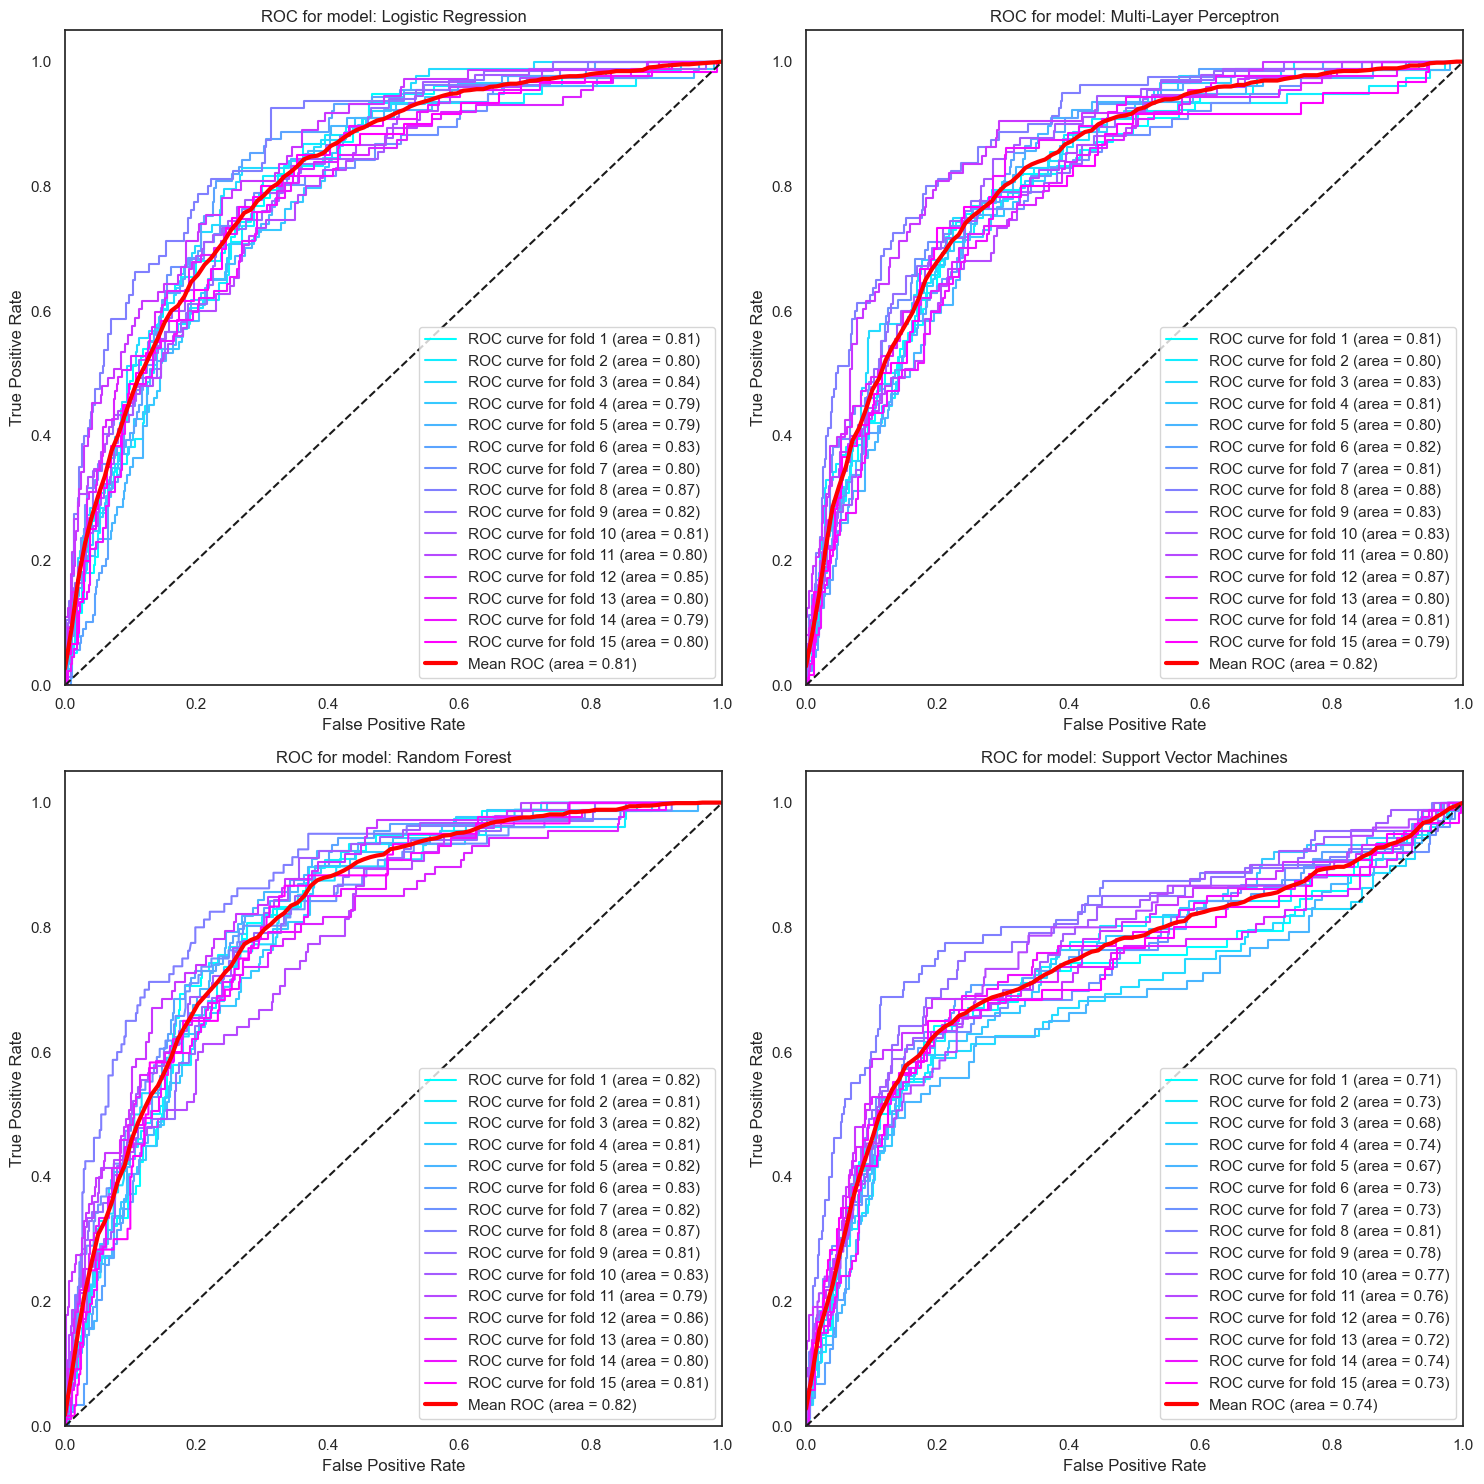

In [89]:
# Takes ~6.5 minutes to run

# Lists to store scores
# We create three empty lists to store the train and validation scores of each model, and the best K-Fold for each model
train_scores = []
validation_scores = []
best_k_fold = []
best_y_predict = []
best_y_true_labels = []

# Define a function to plot ROC curve
def plot_roc_curve(fprs, tprs, titles, subplot_row, subplot_col):
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(subplot_row, subplot_col, figsize=(15,15))
    # Create a color map to color the individual ROC curves
    cmap = plt.get_cmap('cool')
    # Generate 15 colors from the color map
    colors = [cmap(i) for i in np.linspace(0, 1, 15)]
    # Loop through each subplot and its corresponding fpr, tpr, and title
    for ax, fpr_tpr_title in zip(axes.flatten(), zip(fprs, tprs, titles)):
        # Plot ROC curves for each fold and the mean ROC curve
        for i, (fpr, tpr) in enumerate(zip(*fpr_tpr_title[:2])):
            if i == 15:  # If it's the mean ROC curve
                ax.plot(fpr, tpr, label='Mean ROC (area = %0.2f)' % auc(fpr, tpr), linewidth=3, color='red')
            else:  # If it's the ROC curve for individual folds
                ax.plot(fpr, tpr, label='ROC curve for fold %d (area = %0.2f)' % (i+1, auc(fpr, tpr)), color=colors[i])
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC for model: ' + fpr_tpr_title[2])
        ax.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

# Define a 15-fold cross-validation
cv = KFold(n_splits=15, shuffle=True, random_state=42)

# Lists to store all the fprs and tprs for all models
all_fprs = []
all_tprs = []

# Fit each model and compute ROC metrics for each fold
for model in models:
    tprs = []
    fprs = []
    scores = []
    y_predictions = []
    y_true_labels = []
    #y_predication = []
    #y_true_label = []
    model_auc = []  # List to store AUC of each fold
    # Loop through each fold
    for train, test in cv.split(df_pca_x):
        model_clone = clone(model)  # Make a clone of the model to ensure that the original one is not fitted
        model_clone.fit(df_pca_x.iloc[train], y.iloc[train])  # Fit the model on the train data
        probas_ = model_clone.predict_proba(df_pca_x.iloc[test])  # Predict probabilities on the test data
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])  # Compute the ROC curve
        tprs.append(tpr)
        fprs.append(fpr)
        model_auc.append(auc(fpr, tpr))  # Compute and store the AUC
        # Append the fold's scores to the scores list
        scores.append([model_clone.score(df_pca_x.iloc[train], y.iloc[train]), model_clone.score(df_pca_x.iloc[test], y.iloc[test])])
        # Append the model's predictions for this fold to y_predictions
        y_predictions.append(model_clone.predict(df_pca_x.iloc[test]))
        # Append the true labels for this fold to y_true_labels
        y_true_labels.append(y.iloc[test].values)
        
    best_scores = []
    # Find the index of the fold with the highest AUC
    max_auc_index = model_auc.index(max(model_auc))
    best_scores = scores[max_auc_index] # Append the list of scores (two scores) for the specific fold from scores list 
    best_k_fold.append(max_auc_index+1) # Append the best K-Fold index
    # Save the train score of the K-Fold with the highest AUC
    train_scores.append(best_scores[0])
    # Save the validation score of the K-Fold with the highest AUC
    validation_scores.append(best_scores[1])
    # Save the predictions of the validation set of the K-Fold with the highest AUC
    best_y_predict.append(y_predictions[max_auc_index])
    # Save the true labels of the validation set of the K-Fold with the highest AUC
    best_y_true_labels.append(y_true_labels[max_auc_index])

    # Compute mean TPR at every distinct FPR for all ROC curves
    mean_fpr = np.linspace(0, 1, 100)
    tprs_interp = [np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fprs, tprs)]
    mean_tpr = np.mean(tprs_interp, axis=0)
    tprs.append(mean_tpr)
    fprs.append(mean_fpr)

    all_tprs.append(tprs)
    all_fprs.append(fprs)

# Plot the ROC curves using the function we defined earlier
plot_roc_curve(all_fprs, all_tprs, titles, 2, 2)

<br>We should first look at the <b>mean AUC</b> for each model, since it summarizes the overall preformance of a model to one number. We can see most of our models did about the same job, with <b>Random Forest and MLP</b> slightly doing a better job than Logistic Regression (0.82 compared to 0.81).
<br>That is of no suprise, as these two models are complex and can achieve good results.

<b>VSM</b>, on the other hand, scored low, <b>although something intersting can be seen in its mean ROC curve</b>: up to FPR ~ 0.2, the TPR is growing steadily fast, in something that looks like a sharper curve than the other models. That means that for <b>low thresholds</b>, VSM is correctly classifying many of the positive examples (high TRP), while still keeping the misclassification of negative examples relatively low (at around FRP=0.2).
<br>It also brings up an intersting point: we are speaking about a health-issue classification problem - we <b>want</b> to be able to predict as much positives as possible, maybe even on behalf of increasing FPR, as respiratory failure can be life threatening. <b>Low thresehold</b> means that the model is more "comfortable" with predicting "Yes" (it is more "liberal" in predicting positive instances) - therefore it will catch more actual positives while probably also increasing the FPR - which is <b>not necessarily</b> the case here, as can be seen in the ROC of fold 8 (FPR closer to the left while TPR raises up).
<br> It can indicate that with more fine tuning of the parameters of this model (which requires processing capabilities we don't possess) - this model might be a better fit, maybe even challenging for the crown. 
<br>Better hyperparameters could include using 'poly' as kernel (which we didn't even manage to run due to processing capabilities), with different sets of gamma and C. 
<br><b>To imporve the current model of VSM (using RBF kernel)</b>, we might want to use a higher C parameter - as to avoid such high FPR (C determines how heavily will the classifier be penalized for misclassifications). We would say that at first we should check how the model behaves with this change and then offer to change gamma accordingly, since we would want gamma to somehow balance C.

<center>---------------------------------------------</center>

## 4.2 Training score VS. Validation score

As was instructed, we took only <b>one</b> K-Fold for this comparison. For that we chose the K-Fold that had the best results for each model.

<b><u>Please note:</b></u> all models have the best AUC for K-Fold 8. That is due to (random_state=42) we stated in the K-Fold instance we created. The code works with (random_state=None) as well, showing exactly which K-Fold recevied the highest K-Fold, but since we wanted the results to be reproducible, we kept the random_state.

In [93]:
# Create a dictionary where keys are the column names and values are the lists of scores
data = {'Model': titles, 'Train Score': train_scores, 'Validation Score': validation_scores, 'Best K-Fold': best_k_fold}

# Create a DataFrame from the dictionary
score_df = pd.DataFrame(data)

# Print the DataFrame
print(score_df)

                     Model  Train Score  Validation Score  Best K-Fold
0      Logistic Regression     0.855938          0.876404            8
1   Multi-Layer Perceptron     0.863436          0.867041            8
2            Random Forest     0.853528          0.850187            8
3  Support Vector Machines     0.851252          0.850187            8


Generally speaking, all models scored pretty well both for the train set and the validation set. It doesn't seem like there is an overfitting for the train set for any model, as both scores for all are on equal terms to each other.
<br>The scores for <b>MLP and Logistic Regression</b> lead the table, and it seems Logistic Regression even did a better job than MLP (lower train score but higher validation score -> not overfit, managed to learn the underlaying patterns).

Supresingly enough, <b>Random Forest</b> got the lowest validation score for this fold (together with SVM) even though it had the highest mean AUC (together with MLP) in general.
<br>Digging up a bit, we understood that can be due to two things:
<br>1. Randomness of the splits: maybe the observations in this fold were less suitable for RF.
<br>2. Threshold chosen for the validation score: while AUC is being calculated across a range of thresholds, the validation score often relies on a specific decision threshold to divide between classes. Therefore, this might be just it - maybe the threshold for the validation didn't match here.

Another suprise would be <b>SVM</b> model. Even though its mean AUC is lower than the others, in this fold the results give fair competition to the other models.

Therefore, we shouldn't rely much on the train/validation scores of one K-Fold, and would rather give more credit to the mean AUC score.

<center>---------------------------------------------</center>

## 4.3 Confusion Matrix

Considering the fact that K-Fold 8 wasn't a very good choice for Random Forest (and therefore the confusion matrix won't be valid), we were left with MLP and Logistic Regression.
<br>We decdied to go with confusion matrix for the logistic regression model.

In [91]:
#  Values for confusion matrix

# Taking the predication of the zero index from best_y_predict, which translates to Logistic Regression predications for K-Fold 8
y_pred = best_y_predict[0] 
y_validation = best_y_true_labels[0] # Same as above, only for the real validations label
cm = confusion_matrix(y_validation, y_pred) # Creating confusion matrix
tn, fp, fn, tp = cm.ravel() # flatting the matrix
cm = np.array([[tp,fp], [fn,tn]]) # Creating a new matrix in the right way :)

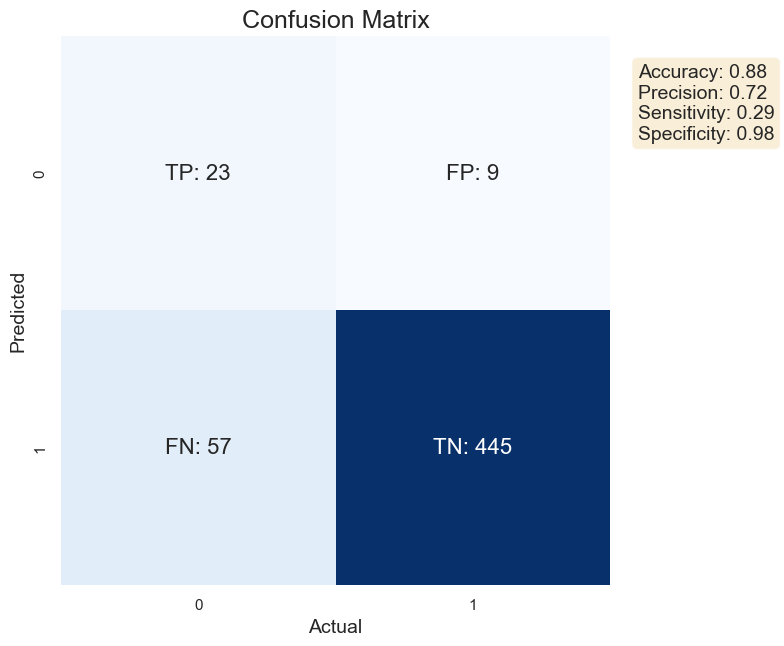

In [92]:
fig, ax = plt.subplots(figsize=(8,8))

# Prepare the labels (2D array matching the shape of the confusion matrix)
labels = np.array([[f'TP: {tp}', f'FP: {fp}'], 
                   [f'FN: {fn}', f'TN: {tn}']])

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 16}, cbar=False, ax=ax)

# Label the axes
ax.set_xlabel('Actual', fontsize=14)
ax.set_ylabel('Predicted', fontsize=14)

# Add a title
ax.set_title('Confusion Matrix', fontsize=18, loc='center')

# Calculate accuracy, precision, sensitivity, and specificity
accuracy = (tp + tn) / (tp + fp + fn + tn)
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Create the text string
textstr = '\n'.join((
    f'Accuracy: {accuracy:.2f}',
    f'Precision: {precision:.2f}',
    f'Sensitivity: {sensitivity:.2f}',
    f'Specificity: {specificity:.2f}'))

# Add text to the plot
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Maintain aspect ratio
ax.set_aspect('equal', 'box')

plt.tight_layout()
plt.show()

<b><u>Some confusion matrix talks:</b></u>
<br>1. The top left square (TP: 23) represents how many <b>True-Positive</b> we got; meaning how many patients that had respiratory failure we managed to predict.
<br><br>2. The lower left square (FN: 57) represents how many <b>False-Negative</b> we got; meaning how many patients that had respiratory failure we didn't manage to predict.
<br><br>3. The top right square (FP: 9) represents how many <b>False-Positive</b> we got; meaning how many patients that didn't had respiratory failure - we predicted they had.
<br><br>4. The lower right square (TN: 445) represents how many <b>True-Negative</b> we got; meaning how many patients that didn't had respiratory failure - we predicted correctly.

On the right side of the matrix we calculated the <b>metrics of accuracy, precision, sensitivity and specificity.</b>
<br>While taking into considiration the fact that we're talking about a model to predict whatever or not a patient will have respiratory failure, we need to think about our metrics prefereances; would we rather be able to find and predict all those who will have respiratory failure (higher sensitivity)? Would we rather be able to find precisely all those who will have respiratory failure (higher precision)?
<br>This questions don't have one right answer and it greatly depends on the customer's needs (customer in this case can be HMO or health insurance company); some customers would rather save money and therefore not catch all paitens (low senstivity), while others prioritize life saving, etc. 

--------------------------------------------------------------------------------------------------------------------------

# Section 5: Running the chosen model on the test set

Eventually, we can choose which model we want to work with.
<br>We decided to choose <b>Random Forest</b> as our model, the reasons are whitin the written assigment.

In this section, we will first fit the model to our whole train set, then we will run the model on the test set and create a csv file to write the prediction probabilities to it.

In [94]:
# Fit the MLP model
rf.fit(df_pca_x, y)

# Prdiction probabilities with MLP model on the test set
prediction_probabilities = rf.predict_proba(test_pca)[:, 1] # We are interested in the probability of target being 1

# Create a DataFrame
submission = pd.DataFrame({"Prediction Probabilities": prediction_probabilities})

# Name the index
submission.index.name = 'ID'

# Save to CSV
submission.to_csv('Submission_group_9.csv', index=True)